#### About
> Web Traffic time series forecast.
* Dataset - https://www.kaggle.com/competitions/web-traffic-time-series-forecasting/data
* Task summary - To forecast future web traffic as time series for approximately 145,000 wikipedia articles.
> Concepts
* Univariate models are statistical analysis approaches that involve the analysis of a single dependent variable. Only one variable varies over time. For ex- Sensor measuring temperature of a room per second.
* Multi variate analysis examines two or more dependent variables and multiple independent variables. Multiple variables are varying over time
* Time series is a data that occurs chronologically one after the other.
* Time series forecasting is using the data of the past to detect the future.
* Forecasting values in dynamic system(i.e source of values is dynamic) is hard.
* Every being, global event, their lives are dynamic system for the web traffic. For example - Whenever a semester starts in a university then that corresponding major's wikipedia may be getting a hit to know more about it.
* We usually tend to remove anomaly from time series dataset i.e abnormal behaviour.



> Steps
1. Data cleaning.
2. Visualisation.
3. Remove anomalies.
4. Apply ARMA Model.
5. Apply ARIMA Model.
6. Apply Exponential Smoothing Model.
7. Apply Prophet approach(fbprophet, future)
8. Apply Auto Arima.
9. Apply DL Model(LSTM).
10. Apply DL model(CNN1D).





In [153]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from datetime import timedelta
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#from fbprophet import Prophet
from pmdarima import auto_arima

from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow import keras

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import r2_score
import re



2023-03-04 11:45:51.453254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 11:45:57.115273: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-04 11:45:57.115321: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-04 11:46:13.770321: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
data_path = "/home/suraj/ClickUp/Mar-Apr/data/train_1.csv"


In [3]:
df = pd.read_csv(data_path)
df.head()
# these are page views per days spread across various columns

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


# 1. Data Cleaning

In [4]:
# Fill missing values
df = df.fillna(0)

In [5]:
# sept to dec data
train_data = pd.melt(df,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [6]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


# 2. Data Visualisation

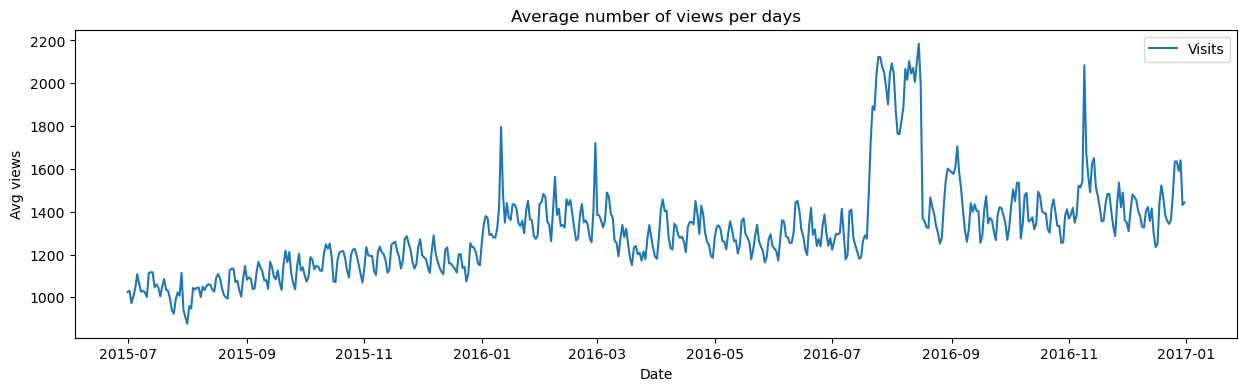

In [7]:
#visualising
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Avg views')
plt.title('Average number of views per days')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

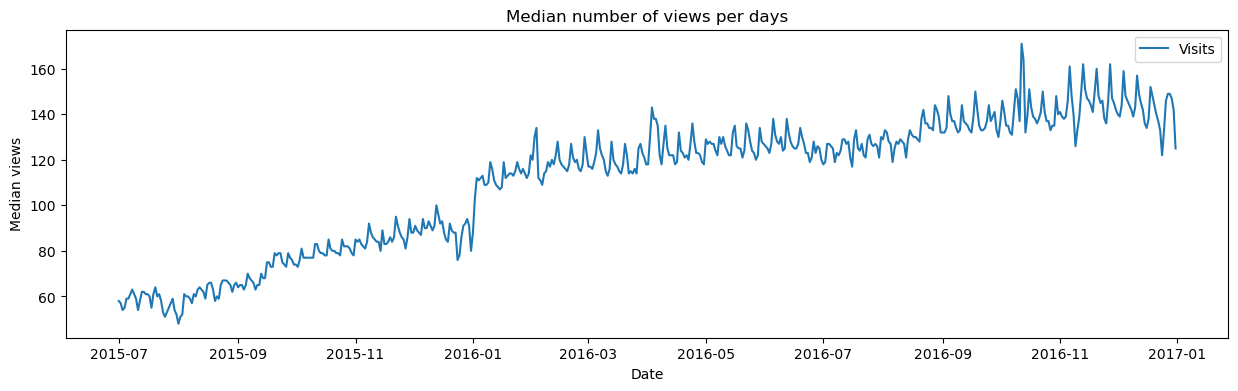

In [8]:
#visualising
temp = train_data.groupby('Date')['Visits'].median()
plt.figure(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Median views')
plt.title('Median number of views per days')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

In [9]:
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


In [10]:
train_data['year']=train_data.Date.dt.year 
train_data['month']=train_data.Date.dt.month 
train_data['day']=train_data.Date.dt.day

In [11]:
#plotting web traffic over days of month using heatmap
# data is of 9th month to 12th
train_data['month_num'] = train_data['month']
train_data['month'].replace('9','9 - September',inplace=True)
train_data['month'].replace('10','10 - October',inplace=True)
train_data['month'].replace('11','11 - November',inplace=True)
train_data['month'].replace('12','12 - December',inplace=True)

In [12]:
train_data

,Page,Date,Visits,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7
...,...,...,...,...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0,2016,12,31,12
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0,2016,12,31,12
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0,2016,12,31,12
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0,2016,12,31,12


In [13]:
train_data['weekday'] = train_data['Date'].apply(lambda x: x.weekday())

In [14]:
train_data['weekday#'] = train_data['weekday']
train_data['weekday'].replace(0,'01 - Monday',inplace=True)
train_data['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_data['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_data['weekday'].replace(3,'04 - Thursday',inplace=True)
train_data['weekday'].replace(4,'05 - Friday',inplace=True)
train_data['weekday'].replace(5,'06 - Saturday',inplace=True)
train_data['weekday'].replace(6,'07 - Sunday',inplace=True)

In [15]:
train_data

,Page,Date,Visits,year,month,day,month_num,weekday,weekday#
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7,03 - Wednesday,2
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7,03 - Wednesday,2
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7,03 - Wednesday,2
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7,03 - Wednesday,2
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7,03 - Wednesday,2
...,...,...,...,...,...,...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0,2016,12,31,12,06 - Saturday,5
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0,2016,12,31,12,06 - Saturday,5
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0,2016,12,31,12,06 - Saturday,5
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0,2016,12,31,12,06 - Saturday,5


In [16]:
train_group = train_data.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

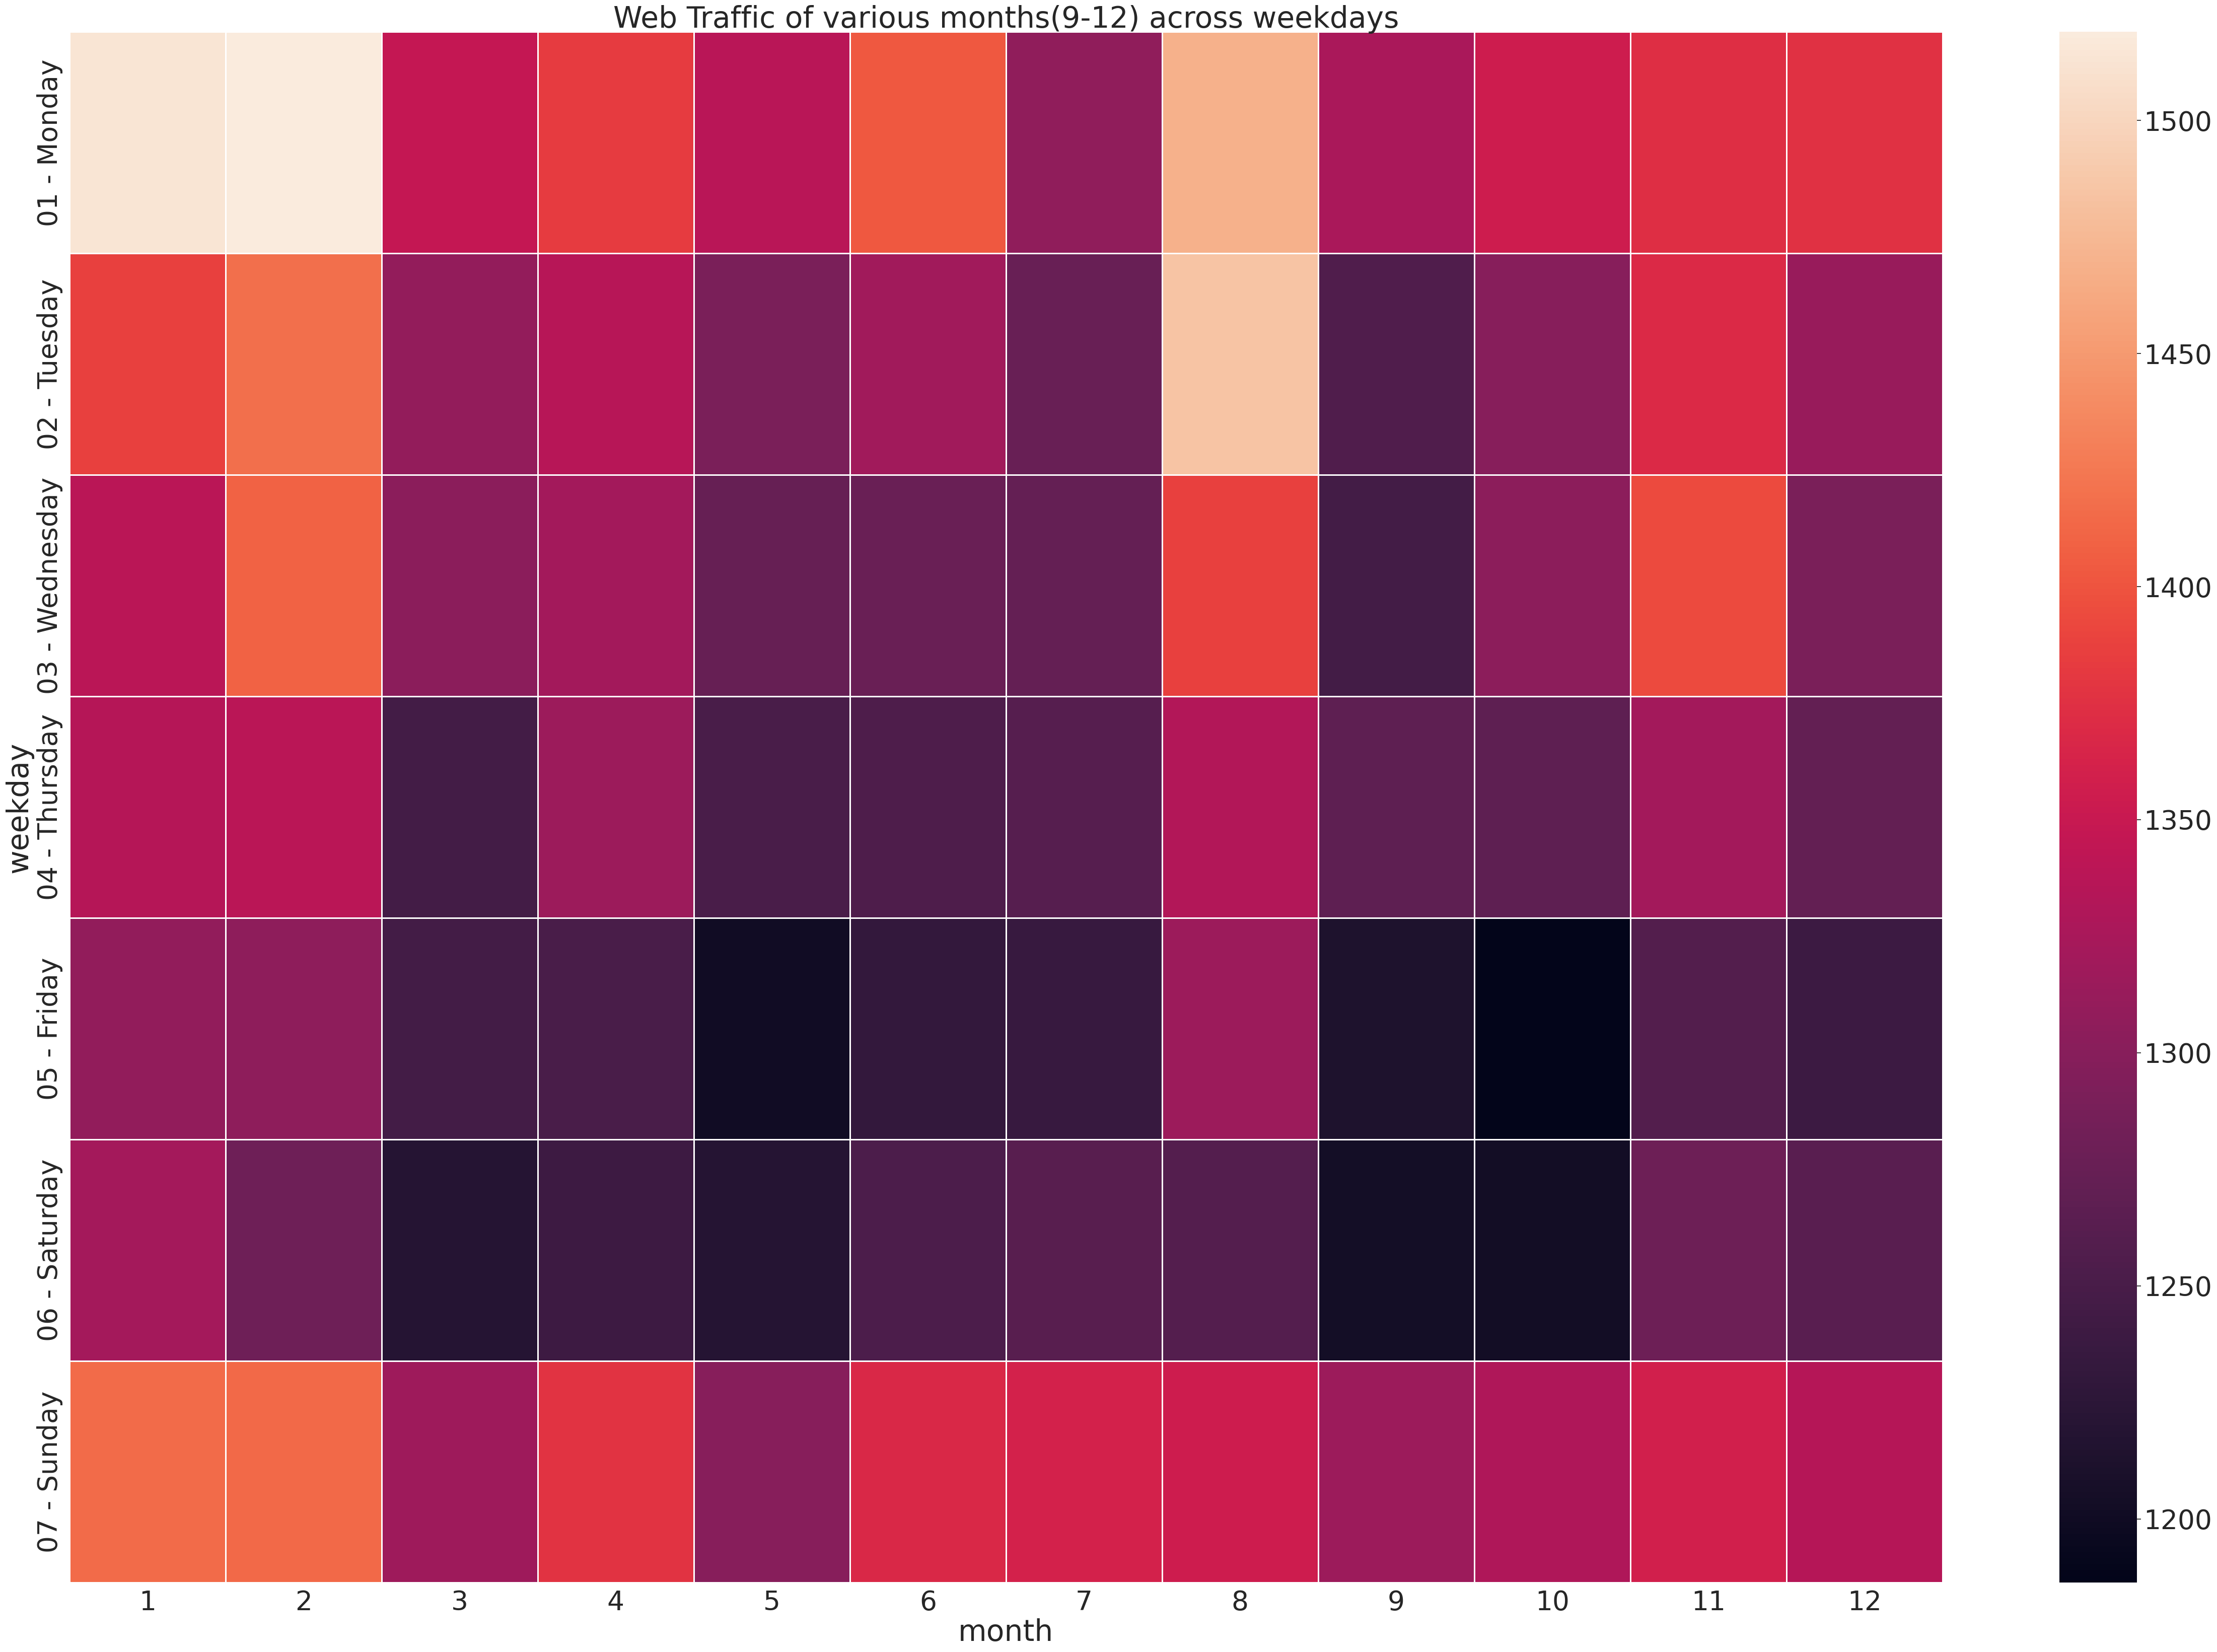

In [17]:
sns.set(font_scale=3.5) 
f, ax = plt.subplots(figsize=(60, 40))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic of various months(9-12) across weekdays')
plt.show()

We can see that the traffic is maximum on fridays and saturdays on most of the months during the span of Sept to Dec.

In [18]:
cols_to_drop = ['year','month','day','month_num','weekday','weekday','weekday#']
train_data.drop(cols_to_drop,axis=1,inplace=True)
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


In [71]:
# top 5 pages with maximum number of views
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(5,'Visits')['Page'].tolist()

In [72]:
top5_pages_df = train_data[train_data['Page'].isin(top_pages_list)]
top5_pages_df

,Page,Date,Visits,Wikipedia_page,Page_language
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0,en,English
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0,en,English
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0,en,English
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-01,8039732.0,en,English
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-01,2983623.0,de,German
...,...,...,...,...,...
79649361,Main_Page_en.wikipedia.org_desktop_all-agents,2016-12-31,19591761.0,en,English
79678160,Main_Page_en.wikipedia.org_all-access_all-agents,2016-12-31,26149541.0,en,English
79678767,Special:Search_en.wikipedia.org_all-access_all...,2016-12-31,1576945.0,en,English
79713701,Main_Page_en.wikipedia.org_mobile-web_all-agents,2016-12-31,3939419.0,en,English


In [73]:
#detecting language across page
def detect_language(page):
    text = page.split('.wikipedia')
    if re.search('[a-z][a-z]',text[0][-2:]):
        return text[0][-2:]
    else: 
        return 'none'

In [ ]:
temp1 = train_data
temp1['Wikipedia_page'] = temp1.Page.apply(detect_language)

In [ ]:
def lang_code(code):
    if code == 'zh':
        return 'Chinese'
    elif code == 'fr':
        return 'French'
    elif code == 'en':
        return 'English'
    elif code == 'ru':
        return 'Russian'
    elif code == 'de':
        return 'German'
    elif code == 'ja':
        return 'Japanese'
    elif code == 'es':
        return 'Spanish'
    else:
        return 'None'

In [ ]:
temp1['Page_language'] = temp1.Wikipedia_page.apply(lang_code)

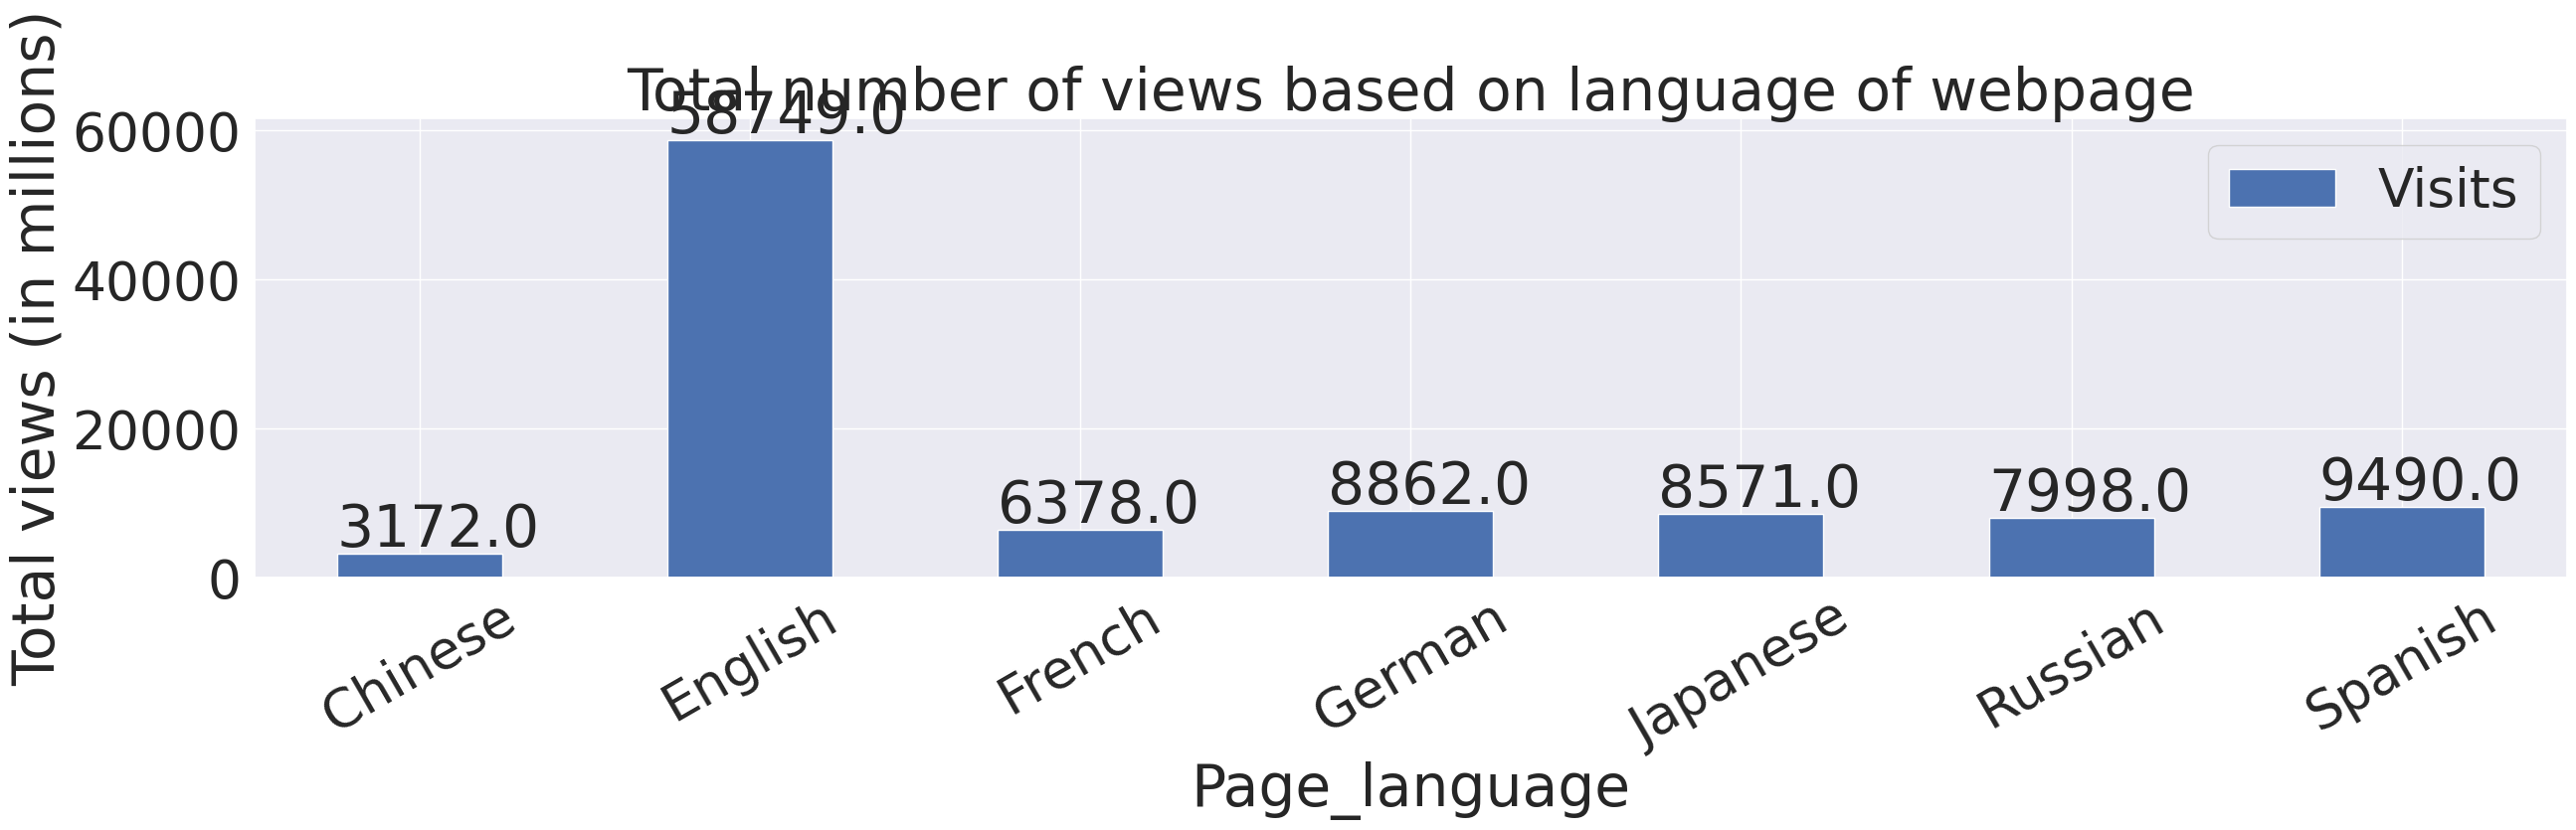

In [ ]:
# Total number of views based on language of Wikipedia webpage
fig,ax = plt.subplots(figsize=(30,6))
lang_df = temp1.groupby('Page_language')['Visits'].sum().reset_index()
lang_df = lang_df[lang_df['Page_language']!='None']
lang_df['Visits'] = round(lang_df['Visits']/1000000,0)

bar_graph = lang_df.plot.bar(x='Page_language',y='Visits',rot=30,ax=ax)
bar_graph.set_ylabel('Total views (in millions)')
bar_graph.set_title('Total number of views based on language of webpage')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+1000))
ax.legend()
plt.show()

In [75]:
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(5,'Visits')['Page'].tolist()
print(top_pages_list)

['Main_Page_en.wikipedia.org_all-access_all-agents', 'Main_Page_en.wikipedia.org_desktop_all-agents', 'Main_Page_en.wikipedia.org_mobile-web_all-agents', 'Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents', 'Special:Search_en.wikipedia.org_all-access_all-agents']


In [76]:
top5_pages_df = train_data[train_data['Page'].isin(top_pages_list)]

In [77]:
top5_pages_df

,Page,Date,Visits,Wikipedia_page,Page_language
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0,en,English
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0,en,English
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0,en,English
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-01,8039732.0,en,English
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-01,2983623.0,de,German
...,...,...,...,...,...
79649361,Main_Page_en.wikipedia.org_desktop_all-agents,2016-12-31,19591761.0,en,English
79678160,Main_Page_en.wikipedia.org_all-access_all-agents,2016-12-31,26149541.0,en,English
79678767,Special:Search_en.wikipedia.org_all-access_all...,2016-12-31,1576945.0,en,English
79713701,Main_Page_en.wikipedia.org_mobile-web_all-agents,2016-12-31,3939419.0,en,English


In [79]:
# Time-series of page with maximum views
top_page_df = train_data[train_data.Page == top_pages_list[0]]
#top_page_df = top_page_df['Visits']
top_page_df['Visits'] = top_page_df['Visits'].div(1000000).round(2)
top_page_df.drop(['Page','Wikipedia_page','Page_language'],axis=1,inplace=True)
top_page_df.head()



/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Visits
38573,2015-07-01,20.38
183636,2015-07-02,20.75
328699,2015-07-03,19.57
473762,2015-07-04,20.44
618825,2015-07-05,20.77


In [82]:
top_page_df.reset_index(inplace=True)

In [83]:
top_page_df.head()


,index,Date,Visits
0,38573,2015-07-01,20.38
1,183636,2015-07-02,20.75
2,328699,2015-07-03,19.57
3,473762,2015-07-04,20.44
4,618825,2015-07-05,20.77


In [84]:
top_page_df.drop('index',axis=1,inplace=True)

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [87]:
top_page_df = top_page_df.set_index('Date')
top_page_df.head()

,Visits
Date,
2015-07-01,20.38
2015-07-02,20.75
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


<AxesSubplot:xlabel='Date'>

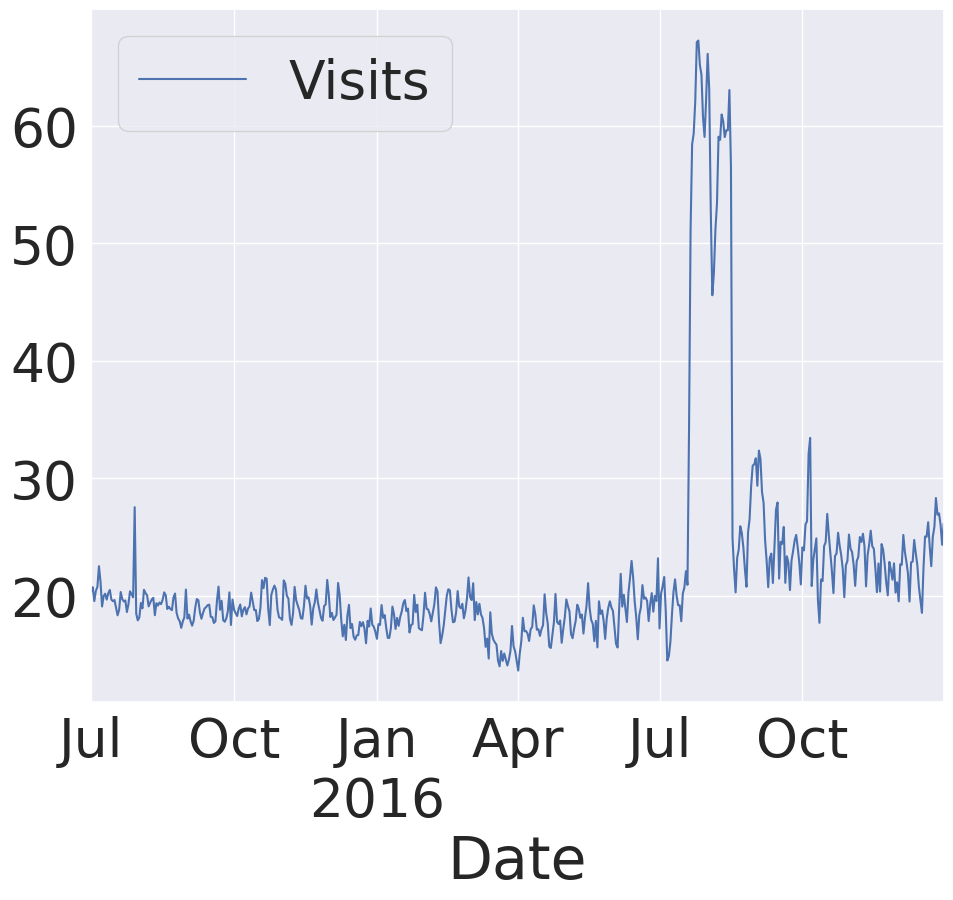

In [88]:
top_page_df.plot()

# 3. Anomaly Detection
- Using isolation forest since as seen in the figure above, There are anomalies in the data. Using data with anomalies for forecasting will affect the accuracy of the model. Hence anomalies are removed using Isolation forest.

In [89]:
isolation_forest_model = IsolationForest(contamination=0.05)
isolation_forest_model.fit(top_page_df)
top_page_df['anomaly'] = isolation_forest_model.predict(top_page_df)

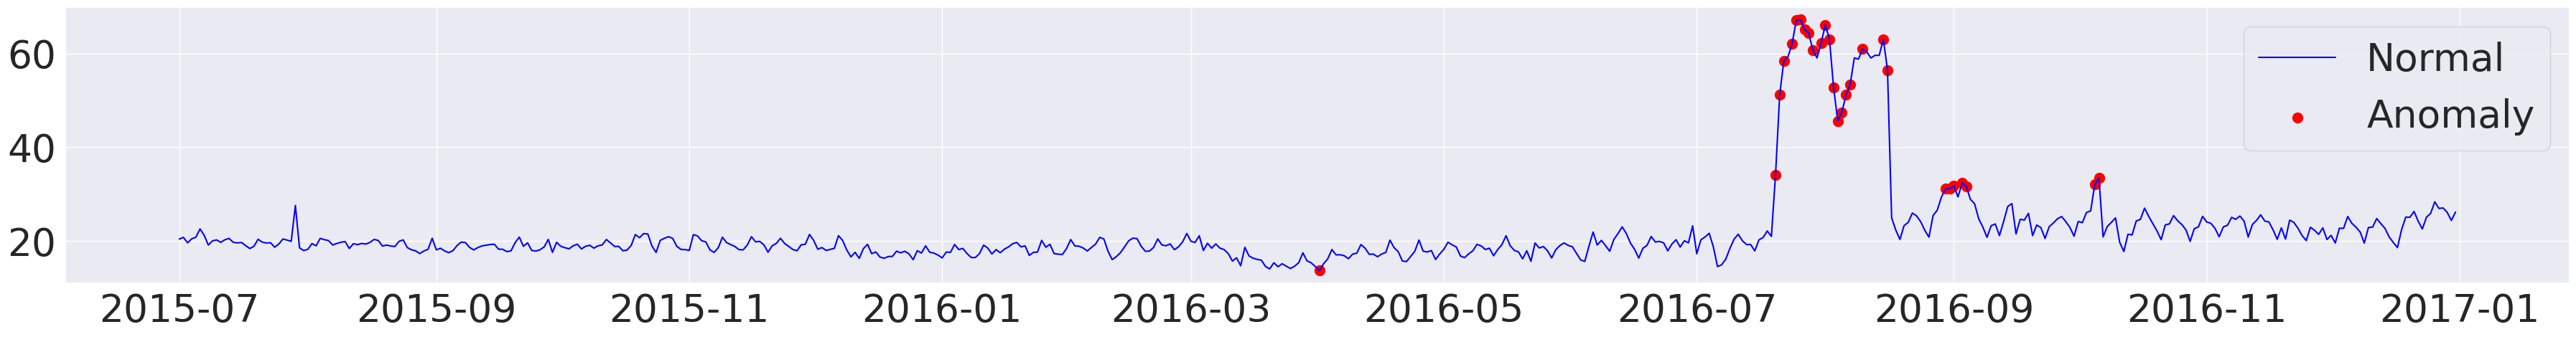

In [92]:
fig, ax = plt.subplots(figsize=(45,5))
anomaly_df = top_page_df.loc[top_page_df['anomaly'] == -1].copy()
ax.plot(top_page_df.index,top_page_df['Visits'],color='blue', label = 'Normal')
plt.scatter(anomaly_df.index,anomaly_df['Visits'],color='red',s=100,label = 'Anomaly')
plt.legend()
plt.show()

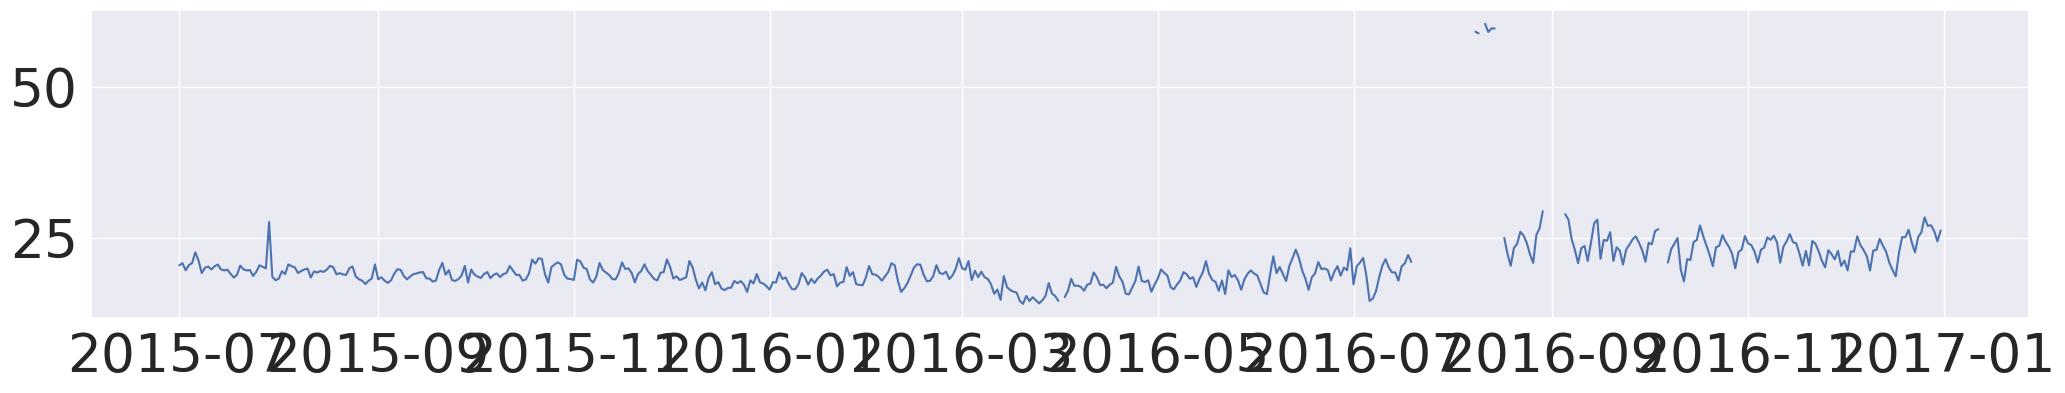

In [94]:
# Removing anomalies from the data
top_page_df['new_visits'] = top_page_df.apply(lambda row: row.Visits if row.anomaly == 1 else None, axis='columns')
plt.figure(figsize=(25,4))
plt.plot(top_page_df.index,top_page_df.new_visits)

Removing anomalies shall create some missing values hence filling them with rolling mean or moving average of 30 days

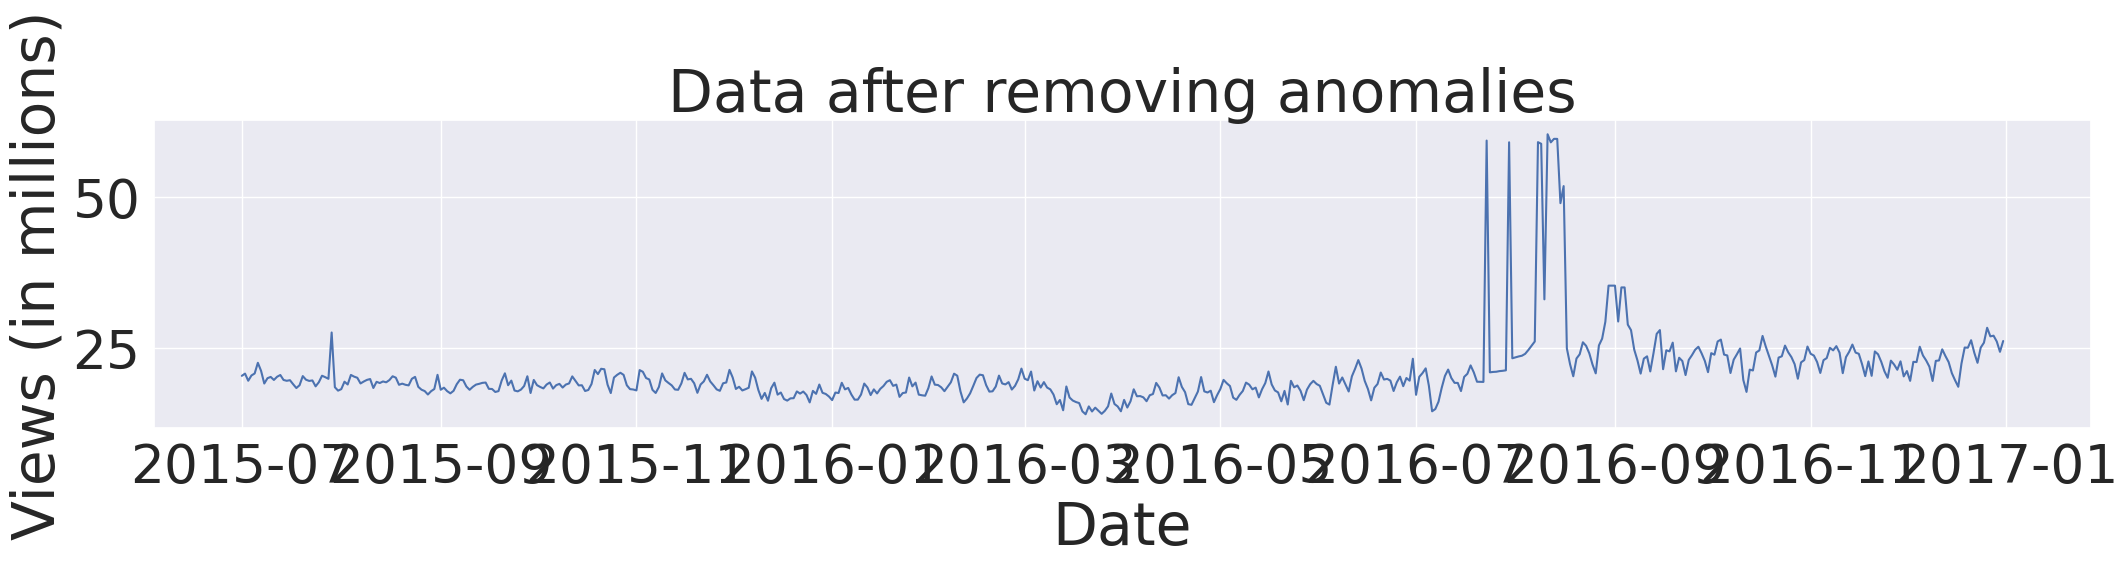

In [96]:
# Filling missing data with rolling mean
top_page_df = top_page_df.assign(rolling_mean=top_page_df.new_visits.fillna(top_page_df.new_visits.rolling(30,min_periods=1).mean()))

plt.figure(figsize=(25,4))
plt.plot(top_page_df.index,top_page_df.rolling_mean)
plt.title('Data after removing anomalies')
plt.xlabel('Date')
plt.ylabel('Views (in millions)')
plt.show()

In [97]:
top_page_df = top_page_df.drop(columns=['Visits','anomaly','new_visits']).rename(columns={'rolling_mean':'Views'})

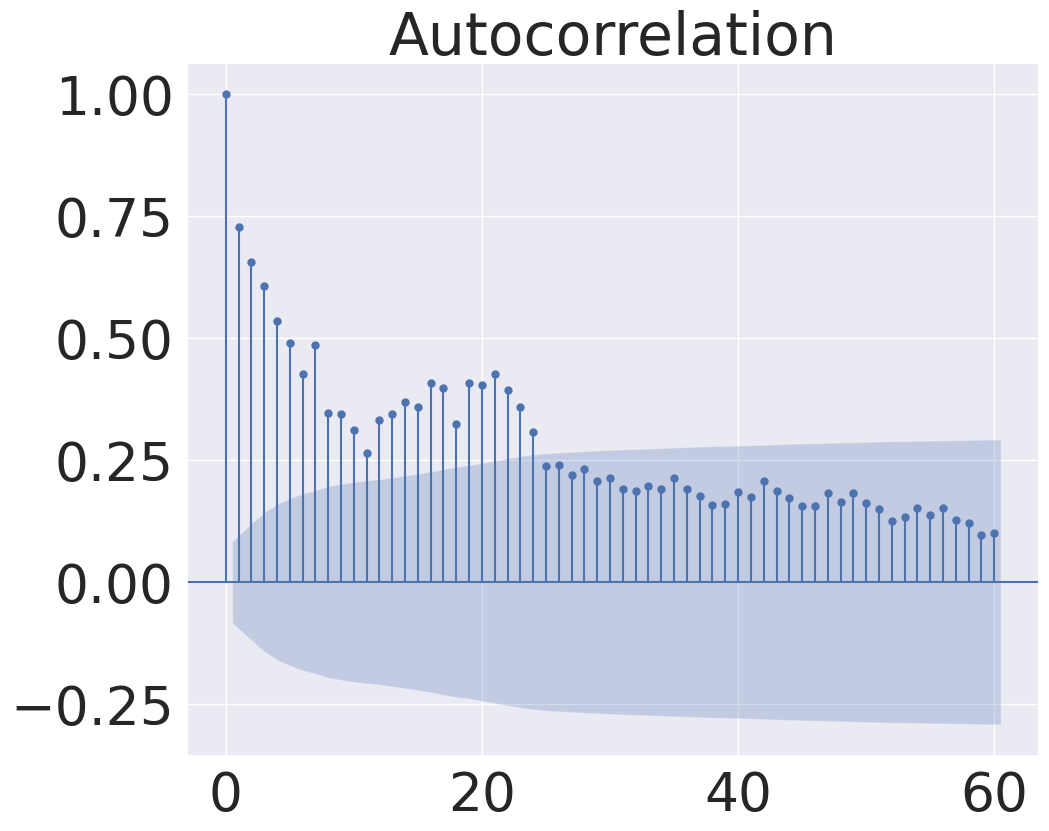

In [98]:
fig = tsaplots.plot_acf(top_page_df['Views'], lags=60)
plt.show()


# Augmented Dicky Fuller Test
1. First element of output is the test statistic. Test statistic shows how likely the data is stationary
2. Second element indicates the p-value. If p-value is >0.05, reject null hypothesis or else not, The null hypothesis is that data is not stationary. 

In [99]:
test = adfuller(top_page_df['Views'])
print(test)

(-2.217872225554355, 0.19982293079545294, 18, 531, {'1%': -3.4427251295084678, '5%': -2.8669984098683736, '10%': -2.5696771375119254}, 2872.5378805022942)


The data is not stationary as per the values.

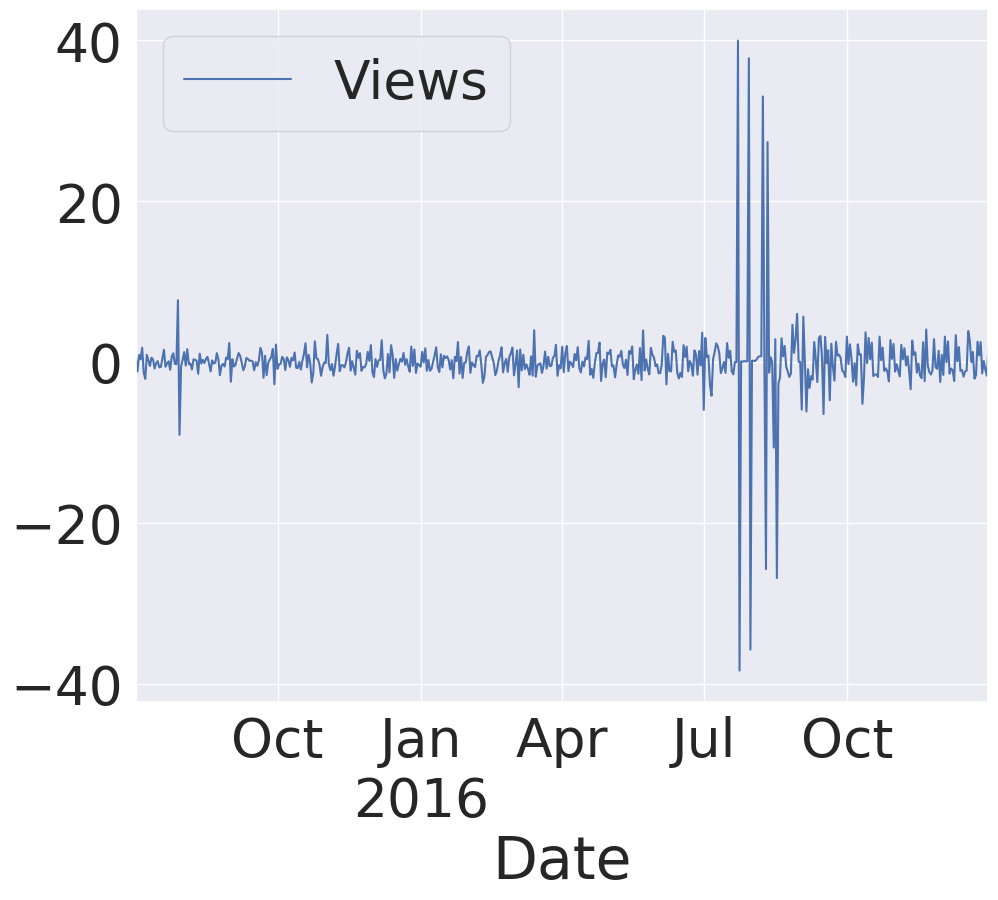

In [100]:
# Differencing the data to make it stationary
top_page_stationary_df = top_page_df.diff().dropna()
ax = top_page_stationary_df.plot()

In [101]:
# Augmented dicky-fuller test on stationary data
test2 = adfuller(top_page_stationary_df['Views'])
print(test2)

(-8.958665940271054, 8.33911133931105e-15, 19, 529, {'1%': -3.442772146350605, '5%': -2.8670191055991836, '10%': -2.5696881663873414}, 2865.554090828862)


Data is stationary

In [102]:
top_page_df

,Views
Date,
2015-07-01,20.38
2015-07-02,20.75
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77
...,...
2016-12-27,26.92
2016-12-28,27.03
2016-12-29,26.07


In [103]:
# preparing data for modelling
train = top_page_df[:'2016-09']
test = top_page_df['2016-10':]

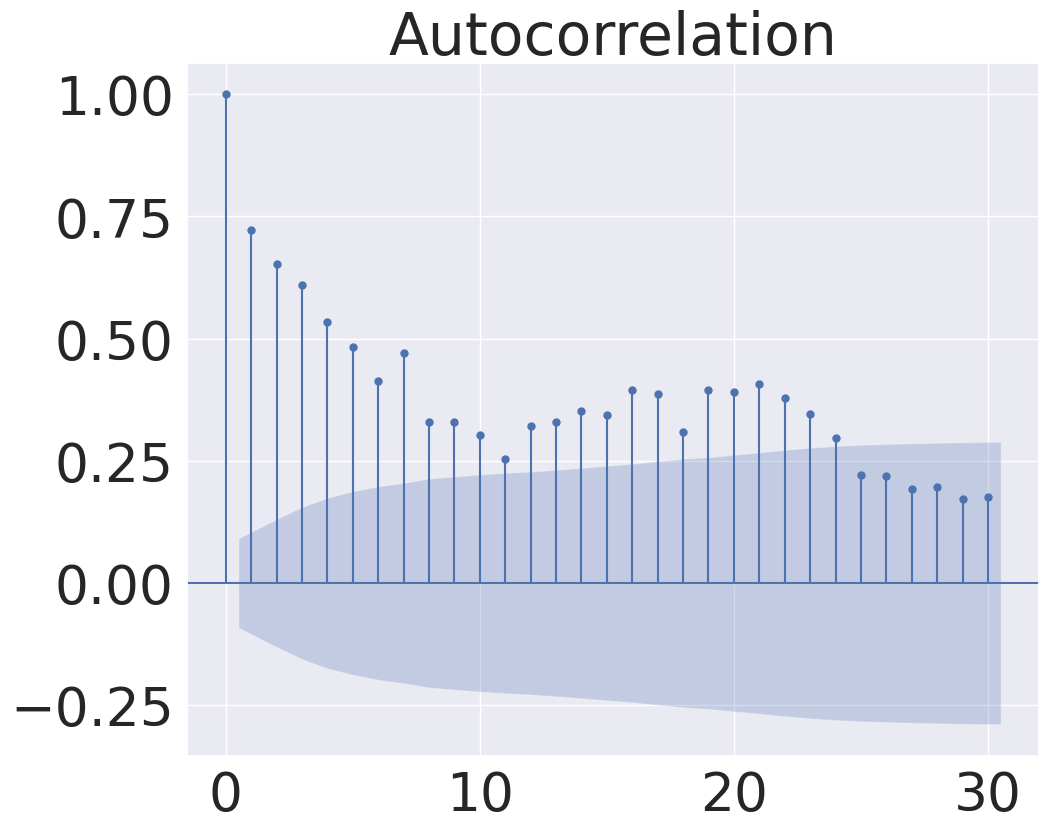

In [104]:
fig = tsaplots.plot_acf(train['Views'], lags=30)
plt.show()

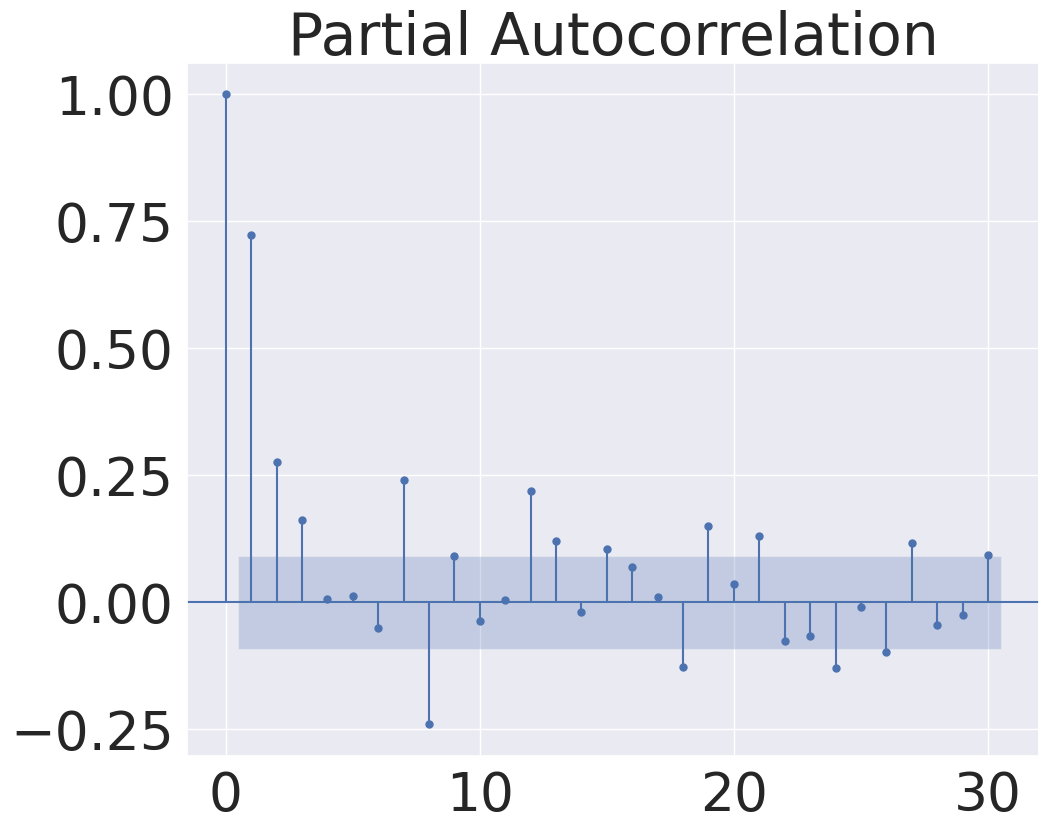

In [105]:
fig = tsaplots.plot_pacf(train['Views'], lags=30)
plt.show()

# 4. ARMA Model

In [106]:
aic_bic_values = []
for p in range(7):
    for q in range(7):
        try:
            model = SARIMAX(train, order=(p,0,q))
            result = model.fit()
            aic_bic_values.append((p,q,result.aic,result.bic))
        except:
            continue

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47543D+00    |proj g|=  2.22933D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.229D-08   4.475D+00
  F =   4.4754290727461052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19354D+00    |proj g|=  1.48499D-01

At iterate    5    f=  3.91581D+00    |proj g|=  2.15487D-03

At iterate   10    f=  3.91155D+00    |proj g|=  8.68097D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     21      1     0     0   2.997D-07   3.912D+00
  F =   3.9115542151686116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  3.73387D+00    |proj g|=  1.42315D-01

At iterate   15    f=  3.63421D+00    |proj g|=  3.39892D-02

At iterate   20    f=  3.63373D+00    |proj g|=  1.31599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     42      1     0     0   6.661D-06   3.634D+00
  F =   3.6337333647555927     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05572D+00    |proj g|=  8.79370D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  3.47575D+00    |proj g|=  9.53358D-02

At iterate   15    f=  3.47030D+00    |proj g|=  1.85112D-02

At iterate   20    f=  3.46108D+00    |proj g|=  1.15063D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     42      1     0     0   8.780D-06   3.461D+00
  F =   3.4610522920739921     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03125D+00    |proj g|=  8.79176D-02

At iterate    5    f=  3.88281D+00    |proj g|=  2.38439D-01

At iterate   10    f=  3.39976D+00    |proj g|=  3.34521D-01

At iterate   15    f=  3.34899D+00    |proj g|=  3.94289D-02

At iterate   20    f=  3.34767D+00    |proj g|=  1.98160D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     33      1     0     0   9.828D-06   3.348D+00
  F =   3.3476678425565720     

CONVERG

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.61565D+00    |proj g|=  7.01440D-01

At iterate   10    f=  3.27364D+00    |proj g|=  1.85727D-01

At iterate   15    f=  3.21365D+00    |proj g|=  2.34039D-02

At iterate   20    f=  3.20947D+00    |proj g|=  7.05248D-03

At iterate   25    f=  3.20523D+00    |proj g|=  3.62361D-02

At iterate   30    f=  3.19922D+00    |proj g|=  8.46147D-03

At iterate   35    f=  3.19918D+00    |proj g|=  1.01138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     54      1     0     0   1.756D-06   3.199D+00
  F =   3.1991750898916176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.84458D+00    |proj g|=  5.03825D-02

At iterate   10    f=  3.43946D+00    |proj g|=  6.67545D-01

At iterate   15    f=  3.27375D+00    |proj g|=  9.29628D-01

At iterate   20    f=  3.21418D+00    |proj g|=  1.49309D-01

At iterate   25    f=  3.20203D+00    |proj g|=  2.96044D-02

At iterate   30    f=  3.19934D+00    |proj g|=  5.44119D-03

At iterate   35    f=  3.19907D+00    |proj g|=  3.83173D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     61      1     0     0   8.383D-05   3.199D+00
  F =   3.1990739639248917     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model


At iterate   10    f=  2.87142D+00    |proj g|=  7.73219D-04

At iterate   15    f=  2.87138D+00    |proj g|=  1.83871D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   9.863D-06   2.871D+00
  F =   2.8713742597386545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87371D+00    |proj g|=  4.91292D-02

At iterate    5    f=  2.87147D+00    |proj g|=  3.13590D-03

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   20    f=  2.87123D+00    |proj g|=  2.16631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   9.891D-06   2.871D+00
  F =   2.8712293000384501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87661D+00    |proj g|=  7.49226D-02

At iterate    5    f=  2.86205D+00    |proj g|=  5.77062D-03

At iterate   10    f=  2.86066D+00    |proj g|=  1.80120D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.85529D+00    |proj g|=  2.22270D-02

At iterate   20    f=  2.85224D+00    |proj g|=  2.67596D-03

At iterate   25    f=  2.85215D+00    |proj g|=  1.03600D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     29      1     0     0   1.446D-05   2.852D+00
  F =   2.8521473166825926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86612D+00    |proj g|=  8.81362D-02


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.84748D+00    |proj g|=  4.71825D-02

At iterate   10    f=  2.84609D+00    |proj g|=  1.43220D-03

At iterate   15    f=  2.84590D+00    |proj g|=  5.97592D-03

At iterate   20    f=  2.84236D+00    |proj g|=  3.92842D-03

At iterate   25    f=  2.84196D+00    |proj g|=  7.04652D-04

At iterate   30    f=  2.84195D+00    |proj g|=  8.76824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     36      1     0     0   4.980D-05   2.842D+00
  F =   2.8419501467788870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87168D+00    |proj g|=  2.09364D-02

At iterate    5    f=  2.87119D+00    |proj g|=  2.76302D-03

At iterate   10    f=  2.87117D+00    |proj g|=  3.24367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   3.242D-05   2.871D+00
  F =   2.8711650971434097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.84176D+00    |proj g|=  4.26656D-04

At iterate   20    f=  2.84165D+00    |proj g|=  1.73988D-05

At iterate   25    f=  2.84164D+00    |proj g|=  1.81500D-03

At iterate   30    f=  2.84160D+00    |proj g|=  1.00222D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     44      1     0     0   2.368D-06   2.842D+00
  F =   2.8416042433816640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   20    f=  2.84220D+00    |proj g|=  5.12088D-03

At iterate   25    f=  2.84178D+00    |proj g|=  3.03478D-03

At iterate   30    f=  2.84135D+00    |proj g|=  3.95235D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     38      1     0     0   2.287D-05   2.841D+00
  F =   2.8413499936550055     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85234D+00    |proj g|=  8.57679D-02


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.84020D+00    |proj g|=  1.14001D-02

At iterate   10    f=  2.83881D+00    |proj g|=  1.44641D-02

At iterate   15    f=  2.83733D+00    |proj g|=  2.39500D-03

At iterate   20    f=  2.83731D+00    |proj g|=  1.03761D-04

At iterate   25    f=  2.83730D+00    |proj g|=  1.87689D-03

At iterate   30    f=  2.83727D+00    |proj g|=  2.57543D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     38      1     0     0   9.760D-06   2.837D+00
  F =   2.8372725699541586     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89568D+00    |proj g|=  2.20580D-01

At iterate    5    f=  2.83899D+00    |proj g|=  2.20326D-02

At iterate   10    f=  2.83473D+00    |proj g|=  2.03163D-02

At iterate   15    f=  2.83284D+00    |proj g|=  3.79377D-03

At iterate   20    f=  2.83214D+00    |proj g|=  1.43597D-03

At iterate   25    f=  2.83213D+00    |proj g|=  4.23912D-04

At iterate   30    f=  2.83213D+00    |proj g|=  1.86643D-04

At iterate   35    f=  2.83212D+00    |proj g|=  6.45858D-04

At iterate   40    f=  2.83211D+00    |proj g|=  5.53277D-04

At iterate   45    f=  2.83211D+00    |proj g|=  7.85957D-04

At iterate   50    f=  2.83211D+00    |proj g|=  1.21956D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.81098D+00    |proj g|=  1.64661D-02

At iterate   10    f=  2.80782D+00    |proj g|=  8.52422D-03

At iterate   15    f=  2.80703D+00    |proj g|=  4.85499D-03

At iterate   20    f=  2.80695D+00    |proj g|=  2.54196D-04

At iterate   25    f=  2.80695D+00    |proj g|=  1.02468D-04

At iterate   30    f=  2.80695D+00    |proj g|=  1.83309D-03

At iterate   35    f=  2.80687D+00    |proj g|=  8.16166D-04

At iterate   40    f=  2.80684D+00    |proj g|=  6.54336D-04

At iterate   45    f=  2.80684D+00    |proj g|=  3.28528D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     46     50   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.87578D+00    |proj g|=  4.13417D-05

At iterate   10    f=  2.87578D+00    |proj g|=  6.00640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   2.493D-06   2.876D+00
  F =   2.8757777186116913     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87742D+00    |proj g|=  1.11365D-02

At iterate    5    f=  2.87601D+00    |proj g|=  3.97395D-03

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.85738D+00    |proj g|=  5.69268D-02

At iterate   10    f=  2.84583D+00    |proj g|=  1.46444D-02

At iterate   15    f=  2.84355D+00    |proj g|=  4.96638D-03

At iterate   20    f=  2.84238D+00    |proj g|=  5.18568D-04

At iterate   25    f=  2.84220D+00    |proj g|=  6.75890D-04

At iterate   30    f=  2.84164D+00    |proj g|=  6.74537D-03

At iterate   35    f=  2.84126D+00    |proj g|=  8.27888D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     52      1     0     0   1.776D-06   2.841D+00
  F =   2.8412568888087888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   25    f=  2.85147D+00    |proj g|=  3.18684D-02

At iterate   30    f=  2.84946D+00    |proj g|=  8.33754D-03

At iterate   35    f=  2.84934D+00    |proj g|=  8.08773D-04

At iterate   40    f=  2.84895D+00    |proj g|=  1.61636D-02

At iterate   45    f=  2.84695D+00    |proj g|=  6.10712D-03

At iterate   50    f=  2.84686D+00    |proj g|=  1.57371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   1.574D-03   2.847D+00
  F =   2.8468594985088975     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.84707D+00    |proj g|=  3.60284D-02

At iterate   10    f=  2.84040D+00    |proj g|=  1.04294D-02

At iterate   15    f=  2.83797D+00    |proj g|=  3.00692D-03

At iterate   20    f=  2.83607D+00    |proj g|=  3.90853D-02

At iterate   25    f=  2.82694D+00    |proj g|=  3.27058D-02

At iterate   30    f=  2.82356D+00    |proj g|=  1.03916D-02

At iterate   35    f=  2.82153D+00    |proj g|=  3.53485D-03

At iterate   40    f=  2.81990D+00    |proj g|=  2.36315D-03

At iterate   45    f=  2.81977D+00    |proj g|=  5.79909D-04


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   50    f=  2.81977D+00    |proj g|=  2.98536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   2.985D-04   2.820D+00
  F =   2.8197723780748896     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96203D+00    |proj g|=  4.09268D-01

At iterate    5    f=  2.83698D+00    |proj g|=  2.19342D-02

At iterate   10    f=  2.82398D+00    |proj g|=  8.02111D-03

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.79695D+00    |proj g|=  2.11925D-02

At iterate   10    f=  2.79299D+00    |proj g|=  1.26487D-02

At iterate   15    f=  2.79085D+00    |proj g|=  3.16929D-03

At iterate   20    f=  2.79076D+00    |proj g|=  2.98492D-04

At iterate   25    f=  2.79075D+00    |proj g|=  1.90164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     31      1     0     0   4.920D-05   2.791D+00
  F =   2.7907542732692194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87438D+00    |proj g|=  1.54081D-03

At iterate    5    f=  2.87437D+00    |proj g|=  3.37633D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      9      1     0     0   3.360D-05   2.874D+00
  F =   2.8743689799476528     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.86466D+00    |proj g|=  9.36431D-03

At iterate   20    f=  2.86435D+00    |proj g|=  2.08046D-02

At iterate   25    f=  2.86376D+00    |proj g|=  2.30964D-02

At iterate   30    f=  2.86239D+00    |proj g|=  1.10988D-02

At iterate   35    f=  2.86217D+00    |proj g|=  1.73830D-03

At iterate   40    f=  2.86217D+00    |proj g|=  1.75464D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     45      1     0     0   1.755D-04   2.862D+00
  F =   2.8621699998910253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.85192D+00    |proj g|=  7.02524D-02

At iterate   20    f=  2.84945D+00    |proj g|=  1.99807D-02

At iterate   25    f=  2.84702D+00    |proj g|=  2.44842D-02

At iterate   30    f=  2.84666D+00    |proj g|=  9.96777D-04

At iterate   35    f=  2.84652D+00    |proj g|=  6.56429D-03

At iterate   40    f=  2.84598D+00    |proj g|=  9.81465D-03

At iterate   45    f=  2.84592D+00    |proj g|=  5.67789D-04

At iterate   50    f=  2.84591D+00    |proj g|=  7.47472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   7.475D-04   2.846D+00
  F =   2.84591375880

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.84546D+00    |proj g|=  2.20801D-02

At iterate   10    f=  2.84185D+00    |proj g|=  8.00221D-03

At iterate   15    f=  2.83427D+00    |proj g|=  4.69939D-02

At iterate   20    f=  2.82426D+00    |proj g|=  6.98243D-03

At iterate   25    f=  2.82282D+00    |proj g|=  2.32417D-03

At iterate   30    f=  2.82244D+00    |proj g|=  9.07630D-03

At iterate   35    f=  2.82210D+00    |proj g|=  5.24434D-03

At iterate   40    f=  2.81969D+00    |proj g|=  7.77034D-03

At iterate   45    f=  2.81910D+00    |proj g|=  1.97404D-03

At iterate   50    f=  2.81908D+00    |proj g|=  5.54241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95472D+00    |proj g|=  3.93296D-01

At iterate    5    f=  2.83811D+00    |proj g|=  2.15152D-02

At iterate   10    f=  2.82454D+00    |proj g|=  1.65998D-02

At iterate   15    f=  2.81676D+00    |proj g|=  1.24199D-02

At iterate   20    f=  2.81358D+00    |proj g|=  9.41778D-03

At iterate   25    f=  2.81127D+00    |proj g|=  5.30995D-02

At iterate   30    f=  2.80939D+00    |proj g|=  1.14597D-02

At iterate   35    f=  2.80633D+00    |proj g|=  4.39541D-02

At iterate   40    f=  2.80490D+00    |proj g|=  6.12570D-02

At iterate   45    f=  2.80382D+00    |proj g|=  8.68601D-03

At iterate   50    f=  2.80328D+00    |proj g|=  4.85258D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.79671D+00    |proj g|=  3.97507D-02

At iterate   10    f=  2.78780D+00    |proj g|=  1.24113D-02

At iterate   15    f=  2.78694D+00    |proj g|=  1.62288D-03

At iterate   20    f=  2.78677D+00    |proj g|=  2.53085D-03

At iterate   25    f=  2.78676D+00    |proj g|=  3.18657D-04

At iterate   30    f=  2.78675D+00    |proj g|=  7.02464D-04

At iterate   35    f=  2.78669D+00    |proj g|=  4.64459D-03

At iterate   40    f=  2.78642D+00    |proj g|=  3.38034D-03

At iterate   45    f=  2.78626D+00    |proj g|=  2.00499D-03

At iterate   50    f=  2.78626D+00    |proj g|=  4.31539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87301D+00    |proj g|=  2.60092D-02

At iterate    5    f=  2.87218D+00    |proj g|=  9.40025D-03

At iterate   10    f=  2.84819D+00    |proj g|=  4.04179D-02

At iterate   15    f=  2.84251D+00    |proj g|=  2.24072D-02

At iterate   20    f=  2.84140D+00    |proj g|=  7.34524D-04

At iterate   25    f=  2.84074D+00    |proj g|=  2.64379D-02

At iterate   30    f=  2.83851D+00    |proj g|=  2.68093D-03

At iterate   35    f=  2.83845D+00    |proj g|=  1.49901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.84735D+00    |proj g|=  2.31881D-02

At iterate   15    f=  2.83645D+00    |proj g|=  1.32956D-02

At iterate   20    f=  2.83319D+00    |proj g|=  1.09437D-02

At iterate   25    f=  2.82459D+00    |proj g|=  5.92367D-03

At iterate   30    f=  2.82145D+00    |proj g|=  8.41281D-03

At iterate   35    f=  2.82017D+00    |proj g|=  9.01895D-04

At iterate   40    f=  2.82008D+00    |proj g|=  2.87509D-03

At iterate   45    f=  2.82006D+00    |proj g|=  1.90524D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     53      1     0     0   1.208D-05   2.820D+00
  F =   2.82005532144

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.85967D+00    |proj g|=  4.85751D-02

At iterate   10    f=  2.84536D+00    |proj g|=  3.85628D-02

At iterate   15    f=  2.84226D+00    |proj g|=  7.51370D-03

At iterate   20    f=  2.84211D+00    |proj g|=  4.93751D-03

At iterate   25    f=  2.84198D+00    |proj g|=  3.27125D-03

At iterate   30    f=  2.84196D+00    |proj g|=  6.60339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     32     37      1     0     0   6.464D-05   2.842D+00
  F =   2.8419613363275409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.84175D+00    |proj g|=  8.71813D-03

At iterate   15    f=  2.83743D+00    |proj g|=  3.11040D-02

At iterate   20    f=  2.82336D+00    |proj g|=  3.61952D-02

At iterate   25    f=  2.82096D+00    |proj g|=  8.99099D-03

At iterate   30    f=  2.81993D+00    |proj g|=  1.53490D-03

At iterate   35    f=  2.81984D+00    |proj g|=  1.20704D-03

At iterate   40    f=  2.81973D+00    |proj g|=  1.39731D-03

At iterate   45    f=  2.81971D+00    |proj g|=  1.47053D-04

At iterate   50    f=  2.81970D+00    |proj g|=  2.64881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96886D+00    |proj g|=  4.13870D-01

At iterate    5    f=  2.84248D+00    |proj g|=  5.39537D-02

At iterate   10    f=  2.80825D+00    |proj g|=  8.99279D-02

At iterate   15    f=  2.80016D+00    |proj g|=  2.66030D-02

At iterate   20    f=  2.79590D+00    |proj g|=  4.12792D-03

At iterate   25    f=  2.79389D+00    |proj g|=  8.80637D-03

At iterate   30    f=  2.79270D+00    |proj g|=  1.16829D-02

At iterate   35    f=  2.79021D+00    |proj g|=  5.50728D-03

At iterate   40    f=  2.78963D+00    |proj g|=  9.13346D-03

At iterate   45    f=  2.78934D+00    |proj g|=  3.49659D-02

At iterate   50    f=  2.78908D+00    |proj g|=  8.26362D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.79096D+00    |proj g|=  1.71055D-02

At iterate   10    f=  2.78454D+00    |proj g|=  1.65551D-02

At iterate   15    f=  2.78355D+00    |proj g|=  4.48964D-03

At iterate   20    f=  2.78313D+00    |proj g|=  9.40082D-03

At iterate   25    f=  2.78306D+00    |proj g|=  3.84881D-04

At iterate   30    f=  2.78305D+00    |proj g|=  2.10667D-03

At iterate   35    f=  2.78303D+00    |proj g|=  4.64453D-03

At iterate   40    f=  2.78302D+00    |proj g|=  2.83224D-03

At iterate   45    f=  2.78300D+00    |proj g|=  2.78454D-03

At iterate   50    f=  2.78300D+00    |proj g|=  6.07290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:


At iterate    5    f=  2.87282D+00    |proj g|=  1.19016D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      9      1     0     0   1.190D-05   2.873D+00
  F =   2.8728183439743051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87285D+00    |proj g|=  3.02582D-02

At iterate    5    f=  2.86457D+00    |proj g|=  9.50846D-02

At iterate   10    f=  2.84399D+00    |proj g|=  1.90382D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.86694D+00    |proj g|=  1.13250D-01

At iterate   10    f=  2.83840D+00    |proj g|=  1.79476D-02

At iterate   15    f=  2.83598D+00    |proj g|=  3.19861D-03

At iterate   20    f=  2.82473D+00    |proj g|=  2.39417D-02

At iterate   25    f=  2.82201D+00    |proj g|=  3.71641D-03

At iterate   30    f=  2.82010D+00    |proj g|=  1.38253D-02

At iterate   35    f=  2.81869D+00    |proj g|=  4.16821D-03

At iterate   40    f=  2.81860D+00    |proj g|=  5.67153D-05

At iterate   45    f=  2.81860D+00    |proj g|=  5.53094D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     47     52   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.86333D+00    |proj g|=  1.15178D-01

At iterate   15    f=  2.84909D+00    |proj g|=  3.41120D-02

At iterate   20    f=  2.84396D+00    |proj g|=  6.66133D-03

At iterate   25    f=  2.84307D+00    |proj g|=  1.83284D-02

At iterate   30    f=  2.84175D+00    |proj g|=  3.55162D-02

At iterate   35    f=  2.84030D+00    |proj g|=  1.61771D-02

At iterate   40    f=  2.83958D+00    |proj g|=  1.12857D-02

At iterate   45    f=  2.83914D+00    |proj g|=  1.24912D-02

At iterate   50    f=  2.83909D+00    |proj g|=  1.80449D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.82207D+00    |proj g|=  8.57257D-02

At iterate   10    f=  2.79131D+00    |proj g|=  2.10968D-02

At iterate   15    f=  2.78665D+00    |proj g|=  1.19937D-02

At iterate   20    f=  2.78417D+00    |proj g|=  4.25591D-03

At iterate   25    f=  2.78332D+00    |proj g|=  3.14807D-02

At iterate   30    f=  2.78232D+00    |proj g|=  6.72206D-03

At iterate   35    f=  2.78186D+00    |proj g|=  5.25518D-03

At iterate   40    f=  2.78074D+00    |proj g|=  4.72390D-03

At iterate   45    f=  2.77958D+00    |proj g|=  7.86331D-03

At iterate   50    f=  2.77866D+00    |proj g|=  5.18344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.91123D+00    |proj g|=  1.09768D-01

At iterate   10    f=  2.84738D+00    |proj g|=  3.75762D-02

At iterate   15    f=  2.83248D+00    |proj g|=  2.51153D-02

At iterate   20    f=  2.82611D+00    |proj g|=  6.54930D-02

At iterate   25    f=  2.81905D+00    |proj g|=  8.60551D-02

At iterate   30    f=  2.81399D+00    |proj g|=  3.31470D-02

At iterate   35    f=  2.81183D+00    |proj g|=  3.53561D-02

At iterate   40    f=  2.81121D+00    |proj g|=  2.53992D-02

At iterate   45    f=  2.81034D+00    |proj g|=  9.90099D-02


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   50    f=  2.80865D+00    |proj g|=  1.71829D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     59      1     0     0   1.718D-01   2.809D+00
  F =   2.8086534555135763     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81349D+00    |proj g|=  1.06301D-01

At iterate    5    f=  2.79088D+00    |proj g|=  5.35760D-02

At iterate   10    f=  2.78193D+00    |proj g|=  1.72440D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [107]:
aic_bic_df = pd.DataFrame(aic_bic_values,columns=['p','q','aic','bic'])
aic_bic_df = aic_bic_df.sort_values(by=['aic','bic'])

In [108]:
# prediction using ARMA model
model = SARIMAX(train,order=(int(aic_bic_df.iloc[0]['p']),0,int(aic_bic_df.iloc[0]['q'])))
result = model.fit()

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85075D+00    |proj g|=  1.28834D-01

At iterate    5    f=  2.82207D+00    |proj g|=  8.57257D-02

At iterate   10    f=  2.79131D+00    |proj g|=  2.10968D-02

At iterate   15    f=  2.78665D+00    |proj g|=  1.19937D-02

At iterate   20    f=  2.78417D+00    |proj g|=  4.25591D-03

At iterate   25    f=  2.78332D+00    |proj g|=  3.14807D-02

At iterate   30    f=  2.78232D+00    |proj g|=  6.72206D-03

At iterate   35    f=  2.78186D+00    |proj g|=  5.25518D-03

At iterate   40    f=  2.78074D+00    |proj g|=  4.72390D-03

At iterate   45    f=  2.77958D+00    |proj g|=  7.86331D-03

At iterate   50    f=  2.77866D+00    |proj g|=  5.18344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [110]:
import pickle
with open('arma_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [111]:
forecast = result.get_prediction(start=-30)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

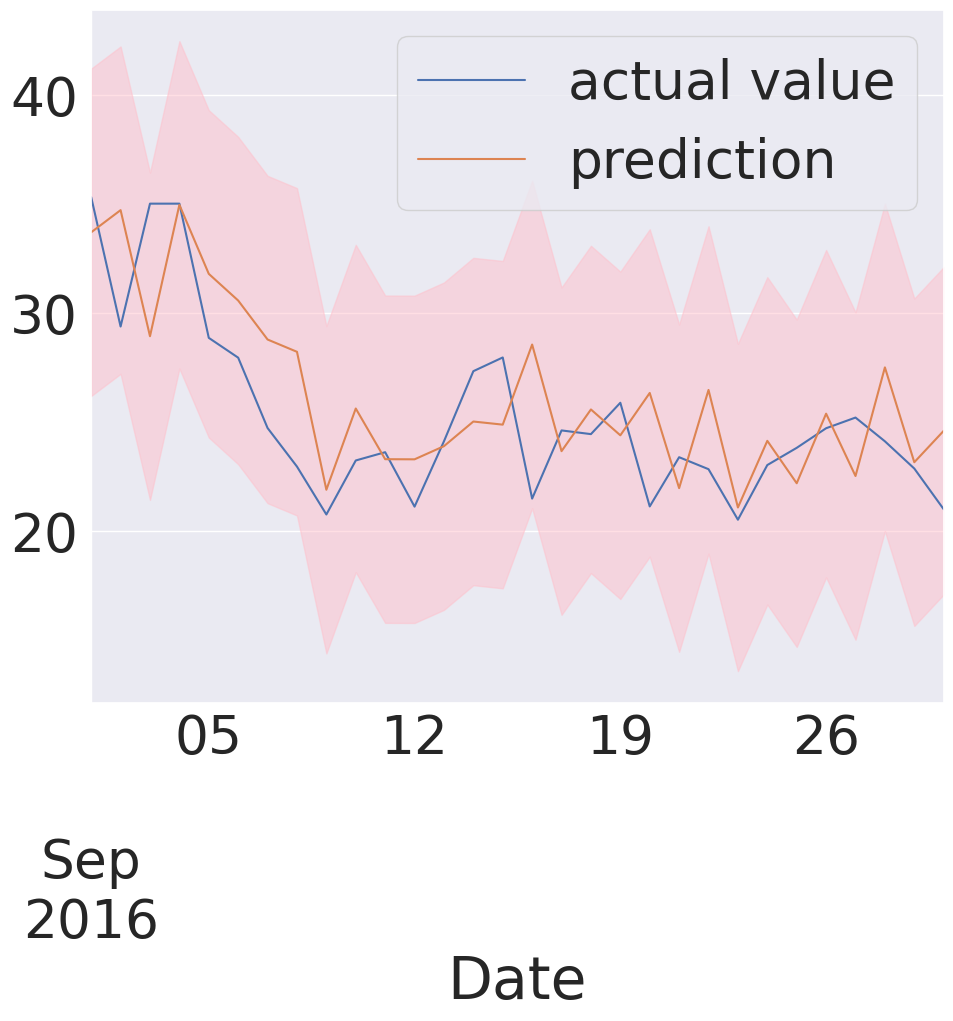

In [112]:
fig,ax=plt.subplots()
train[-30:].rename(columns={'Views':'actual value'}).plot(ax=ax)
forecast_mean.plot(ax=ax,label='prediction')
plt.fill_between(confidence_interval.index, \
                confidence_interval['lower Views'], \
                confidence_interval['upper Views'], \
                color='pink', alpha=0.5)
plt.legend()
plt.show()

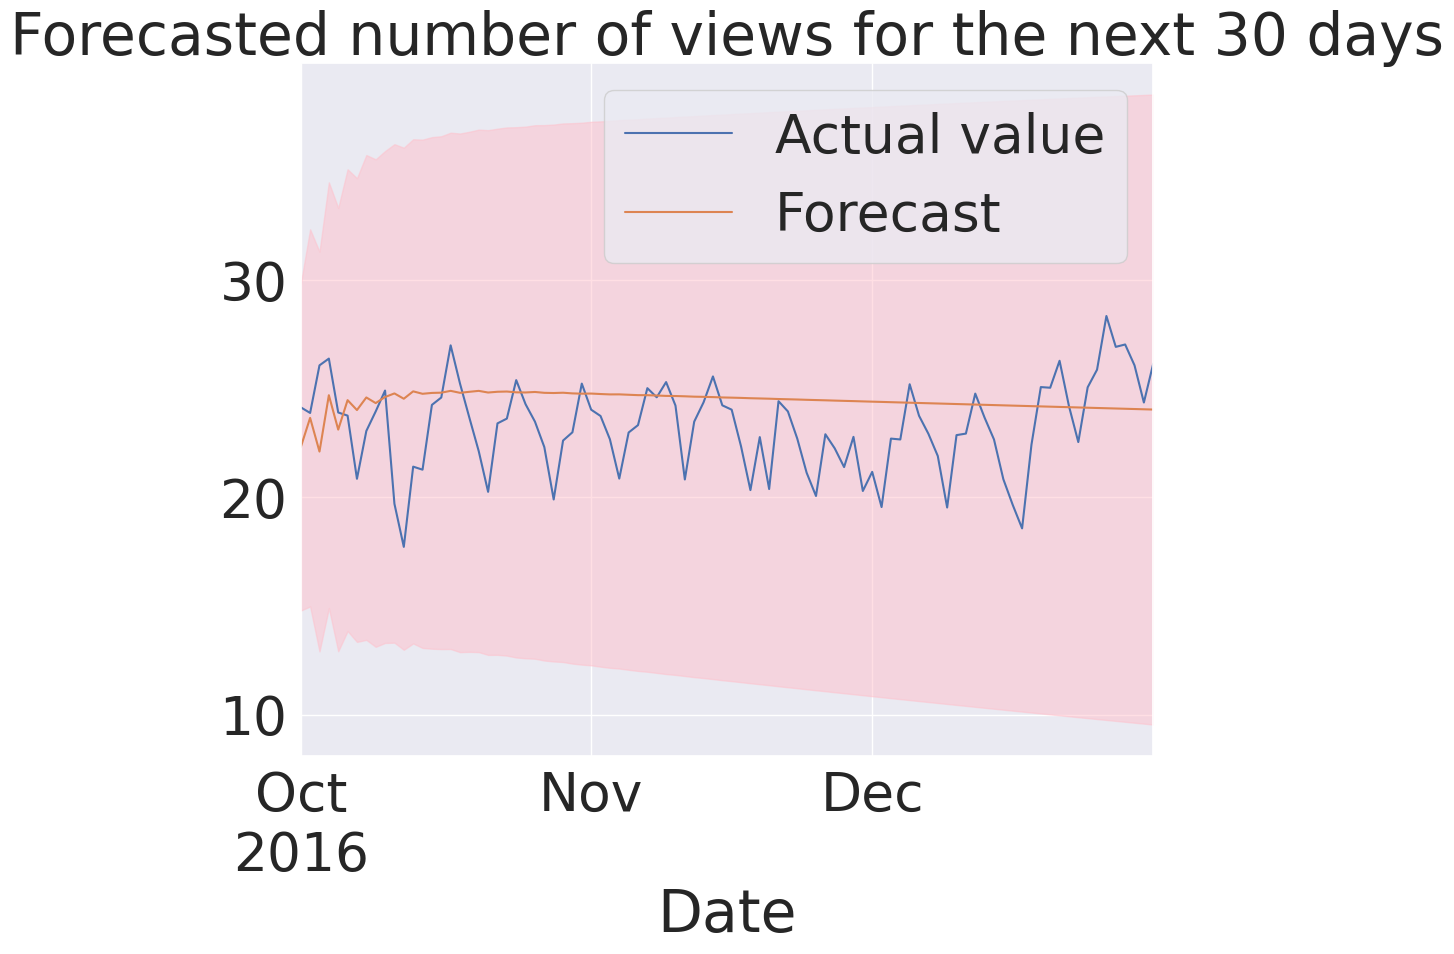

In [113]:
# forecasting using ARMA model
forecast_values = result.get_forecast(steps=test.shape[0])
forecast_values_mean = forecast_values.predicted_mean
conf_interval = forecast_values.conf_int()

arma_forecast_df = pd.DataFrame({'Date':test.index,'Views':forecast_values.predicted_mean,'lower_views':conf_interval['lower Views'].values,'upper_views':conf_interval['upper Views'].values})
arma_forecast_df = arma_forecast_df.set_index('Date')

fig,ax=plt.subplots()
test.rename(columns={'Views':'Actual value'}).plot(ax=ax)
arma_forecast_df[['Views']].rename(columns={'Views':'Forecast'}).plot(ax=ax,label='Forecast')
plt.fill_between(arma_forecast_df.index, \
                arma_forecast_df.lower_views, \
                arma_forecast_df.upper_views, \
                color='pink', alpha=0.5)
plt.title('Forecasted number of views for the next 30 days')
plt.legend()
plt.show()

In [114]:
rmse_values = []
rmse_values.append(('ARMA',np.sqrt(np.mean(np.square(forecast_values_mean.values - test.Views.values)))))


# 5. ARIMA Model


In [115]:
arima_aic_bic = []
for p in range(7):
    for q in range(7):
        try:
            arima_model = SARIMAX(train, order=(p,1,q))
            arima_result = arima_model.fit()
            arima_aic_bic.append((p,q,arima_result.aic,arima_result.bic))
        except:
            continue

arima_aic_bic_df = pd.DataFrame(arima_aic_bic,columns=['p','q','aic','bic'])
arima_aic_bic_df = arima_aic_bic_df.sort_values(by=['aic','bic'])

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96829D+00    |proj g|=  4.60777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   8.238D-08   2.968D+00
  F =   2.9682937884992437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.8

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.84269D+00    |proj g|=  7.23722D-03

At iterate   10    f=  2.84253D+00    |proj g|=  1.32084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     14      1     0     0   5.327D-06   2.843D+00
  F =   2.8425312996704588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84642D+00    |proj g|=  5.66718D-02

At iterate    5    f=  2.83341D+00    |proj g|=  4.33038D-02


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.83224D+00    |proj g|=  2.44645D-03

At iterate   15    f=  2.83223D+00    |proj g|=  2.47627D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     18      1     0     0   4.421D-06   2.832D+00
  F =   2.8322276787974960     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89268D+00    |proj g|=  7.58841D-04

At iterate    5    f=  2.89268D+00    |proj g|=  1.32290D-06

       

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86360D+00    |proj g|=  1.88039D-02

At iterate    5    f=  2.86230D+00    |proj g|=  4.09577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   6.076D-07   2.862D+00
  F =   2.8622937200703800     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.86264D+00    |proj g|=  2.24746D-03

At iterate   10    f=  2.86260D+00    |proj g|=  2.00017D-03

At iterate   15    f=  2.83938D+00    |proj g|=  1.94605D-02

At iterate   20    f=  2.83421D+00    |proj g|=  2.53604D-03

At iterate   25    f=  2.83286D+00    |proj g|=  8.21257D-04

At iterate   30    f=  2.83280D+00    |proj g|=  1.72008D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   1.786D-06   2.833D+00
  F =   2.8327970912983718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85724D+00    |proj g|=  1.20388D-01

At iterate    5    f=  2.83085D+00    |proj g|=  4.86641D-03

At iterate   10    f=  2.82926D+00    |proj g|=  5.26362D-03

At iterate   15    f=  2.82845D+00    |proj g|=  1.10420D-02

At iterate   20    f=  2.82823D+00    |proj g|=  3.88574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   8.194D-06   2.828D+00
  F =   2.8282252344558887     

CONVERG

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88748D+00    |proj g|=  2.31717D-01

At iterate    5    f=  2.82790D+00    |proj g|=  3.45282D-02

At iterate   10    f=  2.82522D+00    |proj g|=  9.09810D-03

At iterate   15    f=  2.82332D+00    |proj g|=  2.72402D-03

At iterate   20    f=  2.82264D+00    |proj g|=  1.13591D-03

At iterate   25    f=  2.82261D+00    |proj g|=  3.23725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     30      1     0     0   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.79829D+00    |proj g|=  6.95649D-03

At iterate   15    f=  2.79727D+00    |proj g|=  3.71194D-03

At iterate   20    f=  2.79711D+00    |proj g|=  6.63706D-04

At iterate   25    f=  2.79710D+00    |proj g|=  1.72273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     32      1     0     0   1.425D-05   2.797D+00
  F =   2.7970963886827516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86785D+00    |proj g|=  9.86145D-04

At iterate    5    f=  2.86785D+00    |proj g|=  1.69090D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.008D-06   2.868D+00
  F =   2.8678497139598833     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   25    f=  2.84813D+00    |proj g|=  1.85474D-02

At iterate   30    f=  2.84315D+00    |proj g|=  2.77790D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   8.426D-06   2.843D+00
  F =   2.8430836001217075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98584D+00    |proj g|=  4.82797D-01

At iterate    5    f=  2.86299D+00    |proj g|=  3.06012D-03


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.86103D+00    |proj g|=  5.19613D-02

At iterate   15    f=  2.82460D+00    |proj g|=  2.77087D-02

At iterate   20    f=  2.81547D+00    |proj g|=  2.69407D-03

At iterate   25    f=  2.81530D+00    |proj g|=  2.01185D-03

At iterate   30    f=  2.81441D+00    |proj g|=  7.93690D-04

At iterate   35    f=  2.81440D+00    |proj g|=  1.23765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     46      1     0     0   1.002D-05   2.814D+00
  F =   2.8144017420661771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87177D+00    |proj g|=  1.62773D-01

At iterate    5    f=  2.84551D+00    |proj g|=  3.67431D-02

At iterate   10    f=  2.82187D+00    |proj g|=  4.90414D-03

At iterate   15    f=  2.82057D+00    |proj g|=  5.27895D-03

At iterate   20    f=  2.82033D+00    |proj g|=  1.09438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     24      1     0     0   1.094D-05   2.820D+00
  F =   2.8203321127295586     

CONVERG

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.81341D+00    |proj g|=  1.87000D-03

At iterate   20    f=  2.81308D+00    |proj g|=  1.73217D-03

At iterate   25    f=  2.81307D+00    |proj g|=  9.15650D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     29      1     0     0   9.156D-06   2.813D+00
  F =   2.8130671828686165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80711D+00    |proj g|=  1.10081D-01


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.78648D+00    |proj g|=  1.89284D-02

At iterate   10    f=  2.78270D+00    |proj g|=  1.03662D-02

At iterate   15    f=  2.78110D+00    |proj g|=  1.62296D-03

At iterate   20    f=  2.78108D+00    |proj g|=  5.25109D-04

At iterate   25    f=  2.78108D+00    |proj g|=  1.61398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     26     28      1     0     0   2.429D-05   2.781D+00
  F =   2.7810756951059035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86528D+00    |proj g|=  1.42437D-02

At iterate    5    f=  2.86458D+00    |proj g|=  1.68616D-02

At iterate   10    f=  2.85133D+00    |proj g|=  5.08220D-02

At iterate   15    f=  2.84180D+00    |proj g|=  8.56799D-03

At iterate   20    f=  2.84069D+00    |proj g|=  1.26836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   1.581D-06   2.841D+00
  F =   2.8406877867912557     

CONVERG

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.81614D+00    |proj g|=  1.03927D-02

At iterate   20    f=  2.81227D+00    |proj g|=  8.73821D-03

At iterate   25    f=  2.81079D+00    |proj g|=  1.76909D-03

At iterate   30    f=  2.81071D+00    |proj g|=  3.06365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     41      1     0     0   5.776D-07   2.811D+00
  F =   2.8107134622162371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.82561D+00    |proj g|=  2.45918D-02

At iterate   20    f=  2.81512D+00    |proj g|=  2.20890D-03

At iterate   25    f=  2.81404D+00    |proj g|=  2.27030D-02

At iterate   30    f=  2.81024D+00    |proj g|=  9.26346D-03

At iterate   35    f=  2.80998D+00    |proj g|=  3.19417D-03

At iterate   40    f=  2.80983D+00    |proj g|=  3.33846D-03

At iterate   45    f=  2.80978D+00    |proj g|=  1.30557D-04

At iterate   50    f=  2.80978D+00    |proj g|=  7.03073D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   7.031D-06   2.810D+00
  F =   2.80978269471

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.84510D+00    |proj g|=  3.40579D-02

At iterate   10    f=  2.82451D+00    |proj g|=  2.77993D-02

At iterate   15    f=  2.82104D+00    |proj g|=  1.09723D-02

At iterate   20    f=  2.81801D+00    |proj g|=  2.64155D-02

At iterate   25    f=  2.81657D+00    |proj g|=  2.55025D-02

At iterate   30    f=  2.81573D+00    |proj g|=  2.03156D-02

At iterate   35    f=  2.81348D+00    |proj g|=  1.81854D-02

At iterate   40    f=  2.81262D+00    |proj g|=  1.10993D-02

At iterate   45    f=  2.81224D+00    |proj g|=  5.24422D-03


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   50    f=  2.81220D+00    |proj g|=  5.92009D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   5.920D-04   2.812D+00
  F =   2.8121972885187008     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94068D+00    |proj g|=  3.47318D-01

At iterate    5    f=  2.83432D+00    |proj g|=  2.94905D-02

At iterate   10    f=  2.82153D+00    |proj g|=  2.10563D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.79008D+00    |proj g|=  1.69674D-02

At iterate   10    f=  2.78223D+00    |proj g|=  1.39821D-02

At iterate   15    f=  2.77825D+00    |proj g|=  8.46829D-03

At iterate   20    f=  2.77751D+00    |proj g|=  2.06429D-03

At iterate   25    f=  2.77727D+00    |proj g|=  1.33338D-02

At iterate   30    f=  2.77673D+00    |proj g|=  5.20885D-03

At iterate   35    f=  2.77667D+00    |proj g|=  5.56176D-04

At iterate   40    f=  2.77667D+00    |proj g|=  2.49333D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     46      1     0     0   2.493D-05   2.777D+00
  F =   2.77666854188

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86454D+00    |proj g|=  1.99508D-03

At iterate    5    f=  2.86452D+00    |proj g|=  3.15414D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      7      1     0     0   3.154D-06   2.865D+00
  F =   2.8645187208509277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 v

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.81430D+00    |proj g|=  2.20388D-02

At iterate   20    f=  2.81130D+00    |proj g|=  5.69057D-03

At iterate   25    f=  2.81024D+00    |proj g|=  2.27822D-03

At iterate   30    f=  2.81003D+00    |proj g|=  3.45934D-04

At iterate   35    f=  2.81003D+00    |proj g|=  9.24079D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     44      1     0     0   3.763D-06   2.810D+00
  F =   2.8100275441683387     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


At iterate    5    f=  2.86121D+00    |proj g|=  2.59398D-02

At iterate   10    f=  2.82792D+00    |proj g|=  6.91683D-02

At iterate   15    f=  2.81432D+00    |proj g|=  9.23429D-03

At iterate   20    f=  2.81034D+00    |proj g|=  5.46170D-03

At iterate   25    f=  2.81003D+00    |proj g|=  1.70853D-04

At iterate   30    f=  2.81002D+00    |proj g|=  8.39251D-04

At iterate   35    f=  2.80994D+00    |proj g|=  6.69215D-03

At iterate   40    f=  2.80980D+00    |proj g|=  9.46569D-04

At iterate   45    f=  2.80976D+00    |proj g|=  3.64595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     60    

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.82450D+00    |proj g|=  2.10527D-02

At iterate   15    f=  2.81875D+00    |proj g|=  5.80282D-03

At iterate   20    f=  2.80703D+00    |proj g|=  2.03562D-02

At iterate   25    f=  2.79971D+00    |proj g|=  2.50124D-02

At iterate   30    f=  2.79828D+00    |proj g|=  4.18365D-03

At iterate   35    f=  2.79751D+00    |proj g|=  2.64146D-02

At iterate   40    f=  2.79717D+00    |proj g|=  6.15776D-03

At iterate   45    f=  2.79700D+00    |proj g|=  2.26291D-03

At iterate   50    f=  2.79698D+00    |proj g|=  2.65267D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.83777D+00    |proj g|=  5.19300D-02

At iterate   10    f=  2.80157D+00    |proj g|=  5.06514D-02

At iterate   15    f=  2.78293D+00    |proj g|=  9.67470D-03

At iterate   20    f=  2.78123D+00    |proj g|=  6.53885D-03

At iterate   25    f=  2.77848D+00    |proj g|=  8.89590D-03

At iterate   30    f=  2.77824D+00    |proj g|=  9.30338D-03

At iterate   35    f=  2.77767D+00    |proj g|=  1.47526D-02

At iterate   40    f=  2.77682D+00    |proj g|=  1.62800D-02

At iterate   45    f=  2.77627D+00    |proj g|=  1.62080D-02

At iterate   50    f=  2.77615D+00    |proj g|=  1.00585D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80280D+00    |proj g|=  8.50205D-02

At iterate    5    f=  2.78506D+00    |proj g|=  4.30495D-02

At iterate   10    f=  2.77636D+00    |proj g|=  4.24477D-02

At iterate   15    f=  2.77508D+00    |proj g|=  5.34545D-03

At iterate   20    f=  2.77478D+00    |proj g|=  3.23306D-03

At iterate   25    f=  2.77379D+00    |proj g|=  1.97475D-02

At iterate   30    f=  2.77338D+00    |proj g|=  6.42153D-03

At iterate   35    f=  2.77332D+00    |proj g|=  2.16216D-03

At iterate   40    f=  2.77327D+00    |proj g|=  1.77033D-03

At iterate   45    f=  2.77325D+00    |proj g|=  2.22735D-03


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:


At iterate   50    f=  2.77323D+00    |proj g|=  1.42440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     56      1     0     0   1.424D-03   2.773D+00
  F =   2.7732318755117604     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86454D+00    |proj g|=  2.38315D-03

At iterate    5    f=  2.86452D+00    |proj g|=  4.94533D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   15    f=  2.81067D+00    |proj g|=  1.63924D-02

At iterate   20    f=  2.80925D+00    |proj g|=  1.05398D-02

At iterate   25    f=  2.80834D+00    |proj g|=  1.33817D-02

At iterate   30    f=  2.80811D+00    |proj g|=  4.82072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     31     37      1     0     0   6.563D-05   2.808D+00
  F =   2.8081077961086041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.83200D+00    |proj g|=  4.53082D-02

At iterate   15    f=  2.81128D+00    |proj g|=  1.80741D-02

At iterate   20    f=  2.80945D+00    |proj g|=  3.20148D-03

At iterate   25    f=  2.80691D+00    |proj g|=  1.35504D-02

At iterate   30    f=  2.80567D+00    |proj g|=  6.35431D-03

At iterate   35    f=  2.80484D+00    |proj g|=  1.28278D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39     47      1     0     0   2.953D-05   2.805D+00
  F =   2.8048339541834300     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.77672D+00    |proj g|=  2.07880D-02

At iterate   10    f=  2.76889D+00    |proj g|=  4.42252D-03

At iterate   15    f=  2.76851D+00    |proj g|=  1.79288D-02

At iterate   20    f=  2.76828D+00    |proj g|=  1.90750D-03

At iterate   25    f=  2.76826D+00    |proj g|=  1.18883D-03

At iterate   30    f=  2.76825D+00    |proj g|=  2.23967D-04

At iterate   35    f=  2.76825D+00    |proj g|=  1.76543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     41      1     0     0   1.765D-05   2.768D+00
  F =   2.7682486782930948     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  3.01516D+00    |proj g|=  2.11406D+00

At iterate   10    f=  2.86557D+00    |proj g|=  4.78565D-01

At iterate   15    f=  2.81177D+00    |proj g|=  6.16427D-02

At iterate   20    f=  2.79879D+00    |proj g|=  8.24856D-02

At iterate   25    f=  2.79671D+00    |proj g|=  4.59643D-03

At iterate   30    f=  2.79654D+00    |proj g|=  2.07681D-03

At iterate   35    f=  2.79650D+00    |proj g|=  1.18377D-02

At iterate   40    f=  2.79634D+00    |proj g|=  6.96798D-03

At iterate   45    f=  2.79629D+00    |proj g|=  5.68931D-03


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   50    f=  2.79607D+00    |proj g|=  1.01812D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   1.018D-02   2.796D+00
  F =   2.7960665491843266     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80268D+00    |proj g|=  8.15866D-02

At iterate    5    f=  2.78305D+00    |proj g|=  3.06196D-02

At iterate   10    f=  2.77087D+00    |proj g|=  2.22139D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.82658D+00    |proj g|=  1.96983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     10      1     0     0   7.269D-06   2.827D+00
  F =   2.8265763701796920     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84288D+00    |proj g|=  5.68706D-02

At iterate    5    f=  2.82594D+00    |proj g|=  1.26713D-01

At iterate   10    f=  2.80428D+00    |proj g|=  1.99059D-02

At iter

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83718D+00    |proj g|=  5.06988D-02

At iterate    5    f=  2.81038D+00    |proj g|=  3.76057D-02

At iterate   10    f=  2.80130D+00    |proj g|=  2.39772D-02

At iterate   15    f=  2.79926D+00    |proj g|=  7.16006D-03

At iterate   20    f=  2.79890D+00    |proj g|=  1.84787D-03

At iterate   25    f=  2.79889D+00    |proj g|=  5.98231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     30      1     0     0   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate   10    f=  2.84839D+00    |proj g|=  6.44075D-02

At iterate   15    f=  2.81294D+00    |proj g|=  1.47227D-02

At iterate   20    f=  2.80910D+00    |proj g|=  6.72944D-03

At iterate   25    f=  2.80807D+00    |proj g|=  1.26678D-03

At iterate   30    f=  2.80798D+00    |proj g|=  4.14923D-03

At iterate   35    f=  2.80091D+00    |proj g|=  4.73643D-02

At iterate   40    f=  2.79576D+00    |proj g|=  2.16930D-02

At iterate   45    f=  2.78214D+00    |proj g|=  2.38457D-02

At iterate   50    f=  2.78116D+00    |proj g|=  5.26142D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     71   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.78238D+00    |proj g|=  6.69214D-02

At iterate   10    f=  2.76991D+00    |proj g|=  1.55660D-02

At iterate   15    f=  2.76829D+00    |proj g|=  5.93044D-03

At iterate   20    f=  2.76794D+00    |proj g|=  1.36017D-02

At iterate   25    f=  2.76780D+00    |proj g|=  2.34791D-03

At iterate   30    f=  2.76772D+00    |proj g|=  1.88671D-03

At iterate   35    f=  2.76771D+00    |proj g|=  1.88174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     39     43      1     0     0   1.786D-05   2.768D+00
  F =   2.7677096481336583     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.78797D+00    |proj g|=  5.79804D-02

At iterate   10    f=  2.77432D+00    |proj g|=  1.22588D-02

At iterate   15    f=  2.77208D+00    |proj g|=  8.56064D-03

At iterate   20    f=  2.77084D+00    |proj g|=  5.21479D-03

At iterate   25    f=  2.76942D+00    |proj g|=  1.02642D-02

At iterate   30    f=  2.76778D+00    |proj g|=  4.00171D-03

At iterate   35    f=  2.76771D+00    |proj g|=  2.96365D-03

At iterate   40    f=  2.76769D+00    |proj g|=  5.33518D-04

At iterate   45    f=  2.76768D+00    |proj g|=  1.11463D-03

At iterate   50    f=  2.76761D+00    |proj g|=  2.12949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.



At iterate    5    f=  2.77671D+00    |proj g|=  4.74204D-02

At iterate   10    f=  2.76793D+00    |proj g|=  7.92613D-03

At iterate   15    f=  2.76747D+00    |proj g|=  1.33297D-03

At iterate   20    f=  2.76742D+00    |proj g|=  3.04913D-03

At iterate   25    f=  2.76741D+00    |proj g|=  2.02833D-04

At iterate   30    f=  2.76741D+00    |proj g|=  5.32417D-05

At iterate   35    f=  2.76741D+00    |proj g|=  1.03099D-04

At iterate   40    f=  2.76741D+00    |proj g|=  8.46729D-05

At iterate   45    f=  2.76741D+00    |proj g|=  1.36405D-03

At iterate   50    f=  2.76737D+00    |proj g|=  2.26832D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [116]:
#predict using arima
arima_model = SARIMAX(train,order=(int(aic_bic_df.iloc[0]['p']),1,int(aic_bic_df.iloc[0]['q'])))
arima_result = arima_model.fit()
arima_forecast_mean = arima_result.get_prediction(steps=-30).predicted_mean

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79539D+00    |proj g|=  3.67401D-02

At iterate    5    f=  2.78238D+00    |proj g|=  6.69214D-02

At iterate   10    f=  2.76991D+00    |proj g|=  1.55660D-02

At iterate   15    f=  2.76829D+00    |proj g|=  5.93044D-03

At iterate   20    f=  2.76794D+00    |proj g|=  1.36017D-02

At iterate   25    f=  2.76780D+00    |proj g|=  2.34791D-03

At iterate   30    f=  2.76772D+00    |proj g|=  1.88671D-03

At iterate   35    f=  2.76771D+00    |proj g|=  1.88174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [117]:
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_model, f)

<Figure size 2400x400 with 0 Axes>

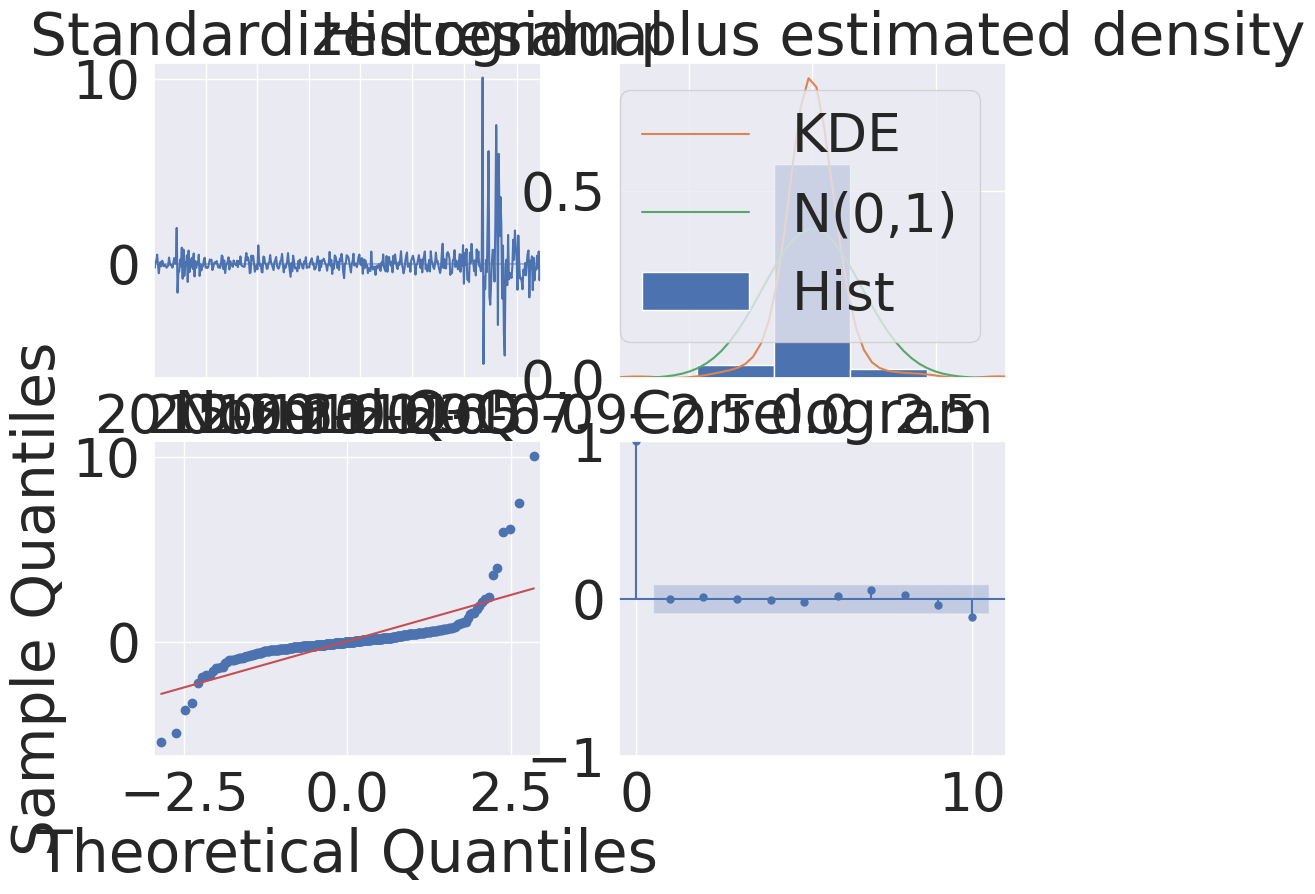

In [124]:
plt.figure(figsize=(24,4))

arima_result.plot_diagnostics()
plt.show()

In [125]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Views   No. Observations:                  458
Model:               SARIMAX(6, 1, 4)   Log Likelihood               -1267.611
Date:                Sat, 04 Mar 2023   AIC                           2557.222
Time:                        11:33:33   BIC                           2602.594
Sample:                    07-01-2015   HQIC                          2575.093
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3721      0.054    -25.532      0.000      -1.477      -1.267
ar.L2         -0.6547      0.077     -8.463      0.000      -0.806      -0.503
ar.L3          0.4602      0.067      6.916      0.000       0.330       0.591
ar.L4          0.8194      0.069     11.828      0.000       0.684       0.955
ar.L5          0.3340      0.054      6.157      0.000       0.228       0.440
ar.L6         -0.0455      0.034     -1.355      0.176      -0.111       0.020
ma.L1          0.9597      0.056     17.248      0.000       0.851       1.069
ma.L2         -0.0771      0.051     -1.521      0.128      -0.177       0.022
ma.L3         -0.9247      0.052    -17.913      0.000      -1.026      -0.824
ma.L4         -0.7750      0.055    -14.014      0.000      -0.883      -0.667
sigma2        14.9414      0.311     47.994      0.000      14.331      15.552
===================================================================================
Ljung-Box (Q):                       73.21   Jarque-Bera (JB):             26974.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.23   Skew:                             3.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

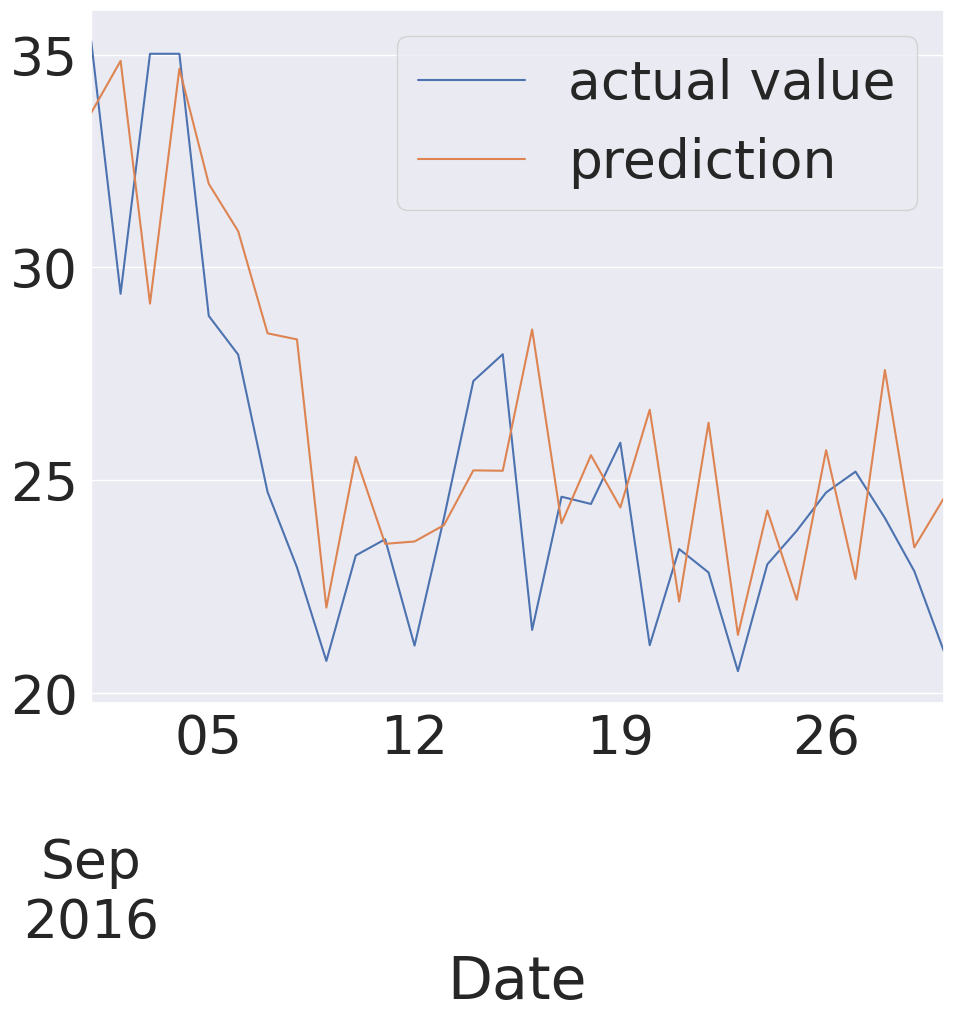

In [126]:
fig,ax=plt.subplots()
train[-30:].rename(columns={'Views':'actual value'}).plot(ax=ax)
arima_forecast_mean[-30:].plot(ax=ax,label='prediction')
plt.legend()
plt.show()

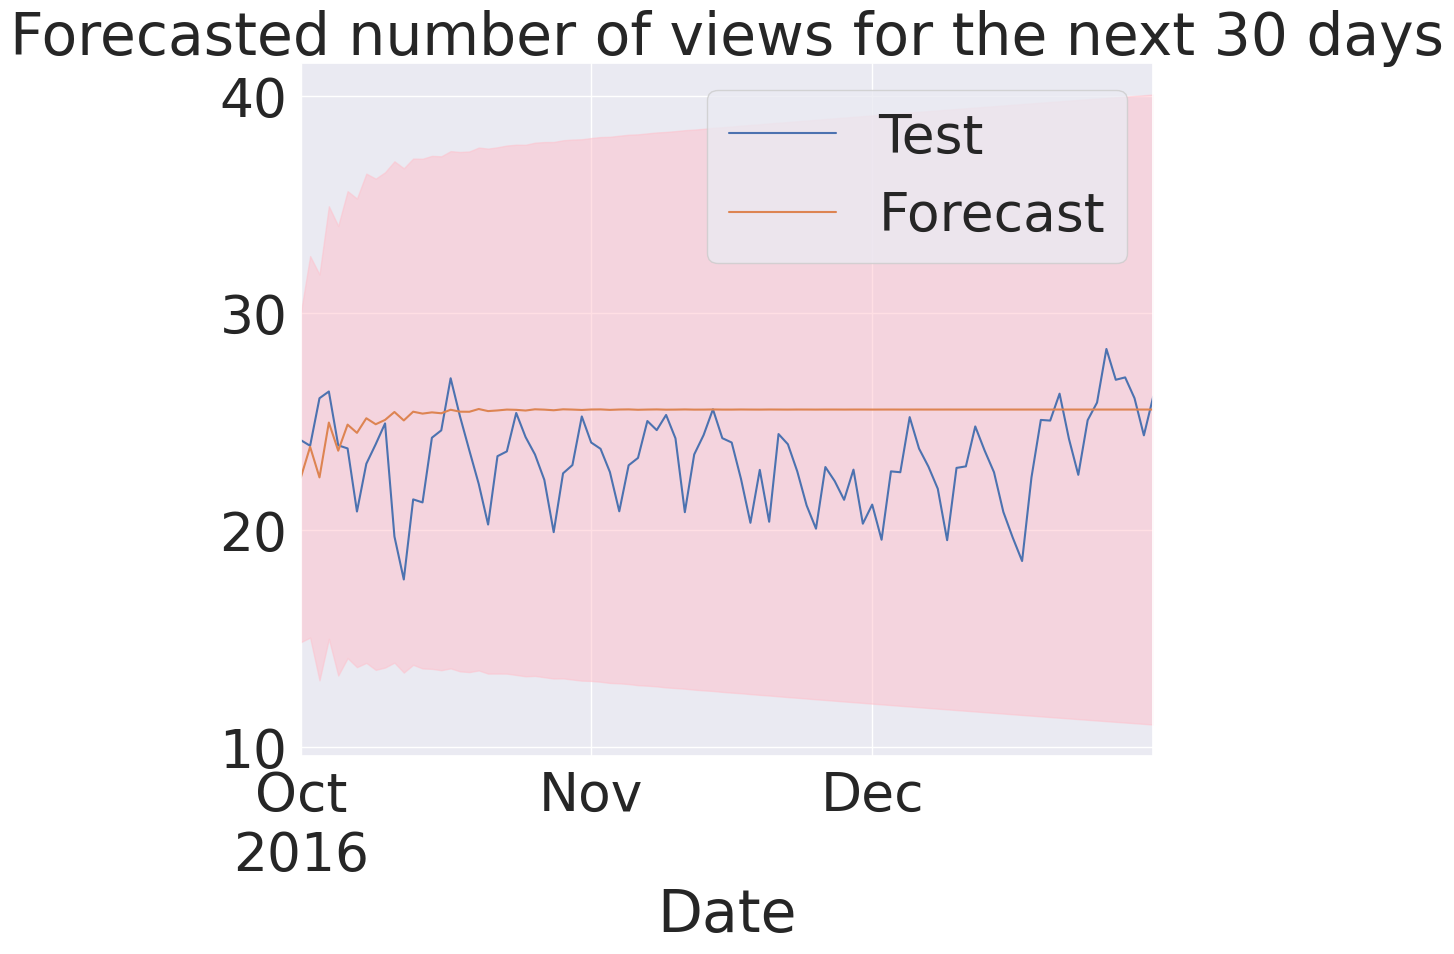

In [127]:
# Forecasting using ARIMA moidel
arima_forecast_values = arima_result.get_forecast(steps=test.shape[0])
arima_forecast_mean = arima_forecast_values.predicted_mean
arima_conf_interval = arima_forecast_values.conf_int()

arima_forecast_df = pd.DataFrame({'Date':test.index,'Views':arima_forecast_values.predicted_mean,'lower_views':arima_conf_interval['lower Views'].values,'upper_views':arima_conf_interval['upper Views'].values})
arima_forecast_df = arima_forecast_df.set_index('Date')

fig,ax=plt.subplots()
test.rename(columns={'Views':'Test'}).plot(ax=ax)
arima_forecast_df[['Views']].rename(columns={'Views':'Forecast'}).plot(ax=ax)
plt.fill_between(arima_forecast_df.index, \
                arima_forecast_df.lower_views, \
                arima_forecast_df.upper_views, \
                color='pink', alpha=0.5)
plt.title('Forecasted number of views for the next 30 days')
plt.legend()
plt.show()

In [128]:
rmse_values.append(('ARIMA',np.sqrt(np.mean(np.square(arima_forecast_df.Views.values - test.Views.values)))))

# 6. Exponential smoothug model

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


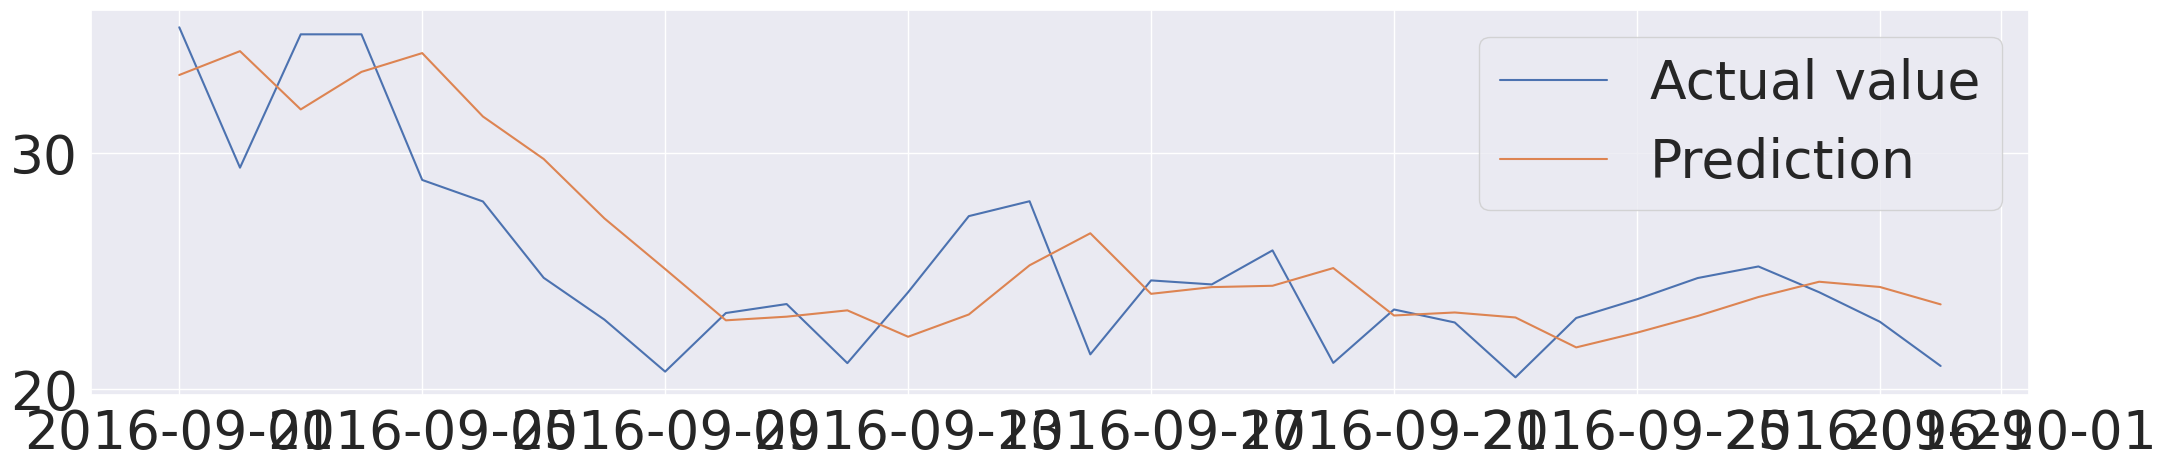

In [133]:
exp_smoothing_model = SimpleExpSmoothing(train)
exp_smoothing_result = exp_smoothing_model.fit(smoothing_level=0.5,optimized=True)

# Prediction using Exponential Smoothing model
exp_smoothing_prediction = exp_smoothing_result.predict(start=train[-30:-29].index[0],end=train[-1:].index[0])

plt.figure(figsize=(25,5))
plt.plot(train[-30:], label='Actual value')
plt.plot(exp_smoothing_prediction, label='Prediction')
plt.legend(loc='best')
plt.show()

In [134]:
with open('exp_smoothing_model.pkl', 'wb') as f:
    pickle.dump(exp_smoothing_model, f)

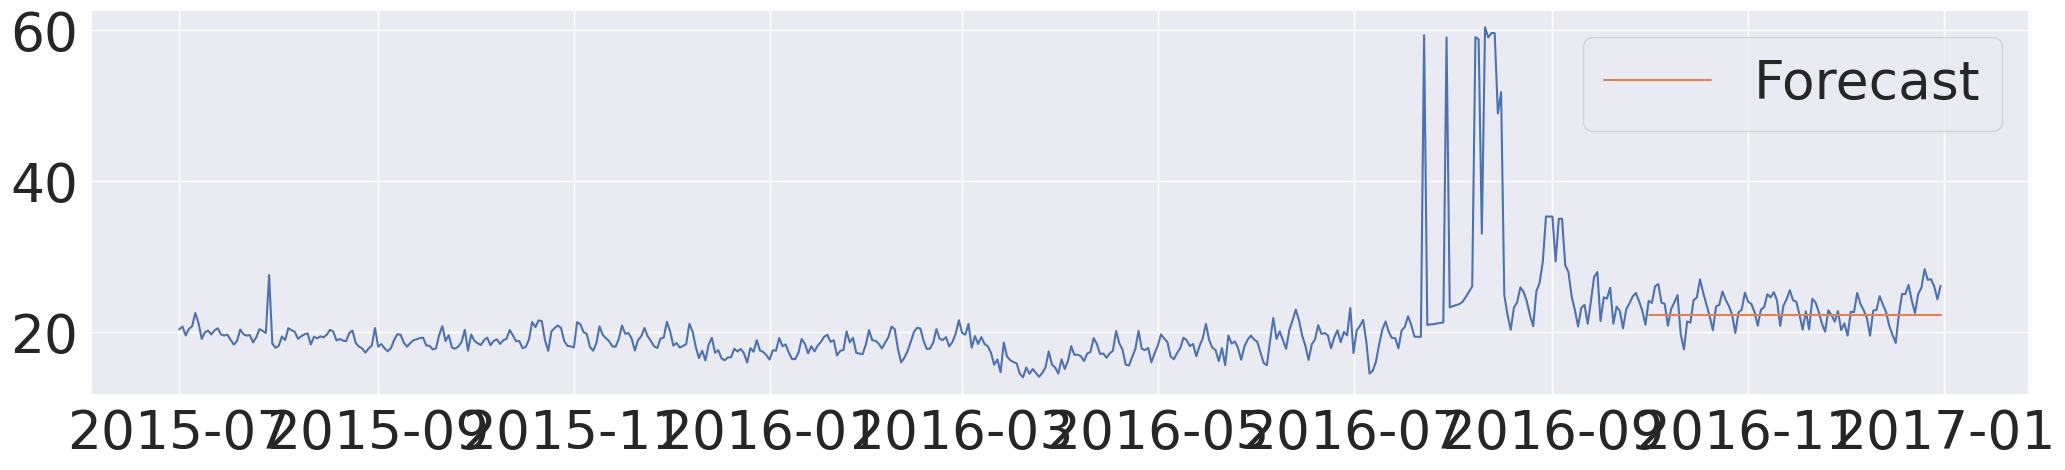

In [136]:
# Forecasting using Exponential smoothing model
exp_smoothing_forecast = exp_smoothing_result.forecast(test.shape[0])
plt.figure(figsize=(25,5))

plt.plot(top_page_df)
plt.plot(exp_smoothing_forecast, label='Forecast')
plt.legend(loc='best')
plt.show()

In [137]:
rmse_values.append(('Exponential Smoothing',np.sqrt(np.mean(np.square(exp_smoothing_forecast.values - test.Views.values)))))

# 8. Auto Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2615.782, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2722.957, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2655.696, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2629.468, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2720.957, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2618.419, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2589.365, Time=0.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2613.593, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2615.420, Time=0.64 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2591.487, Time=1.13 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0

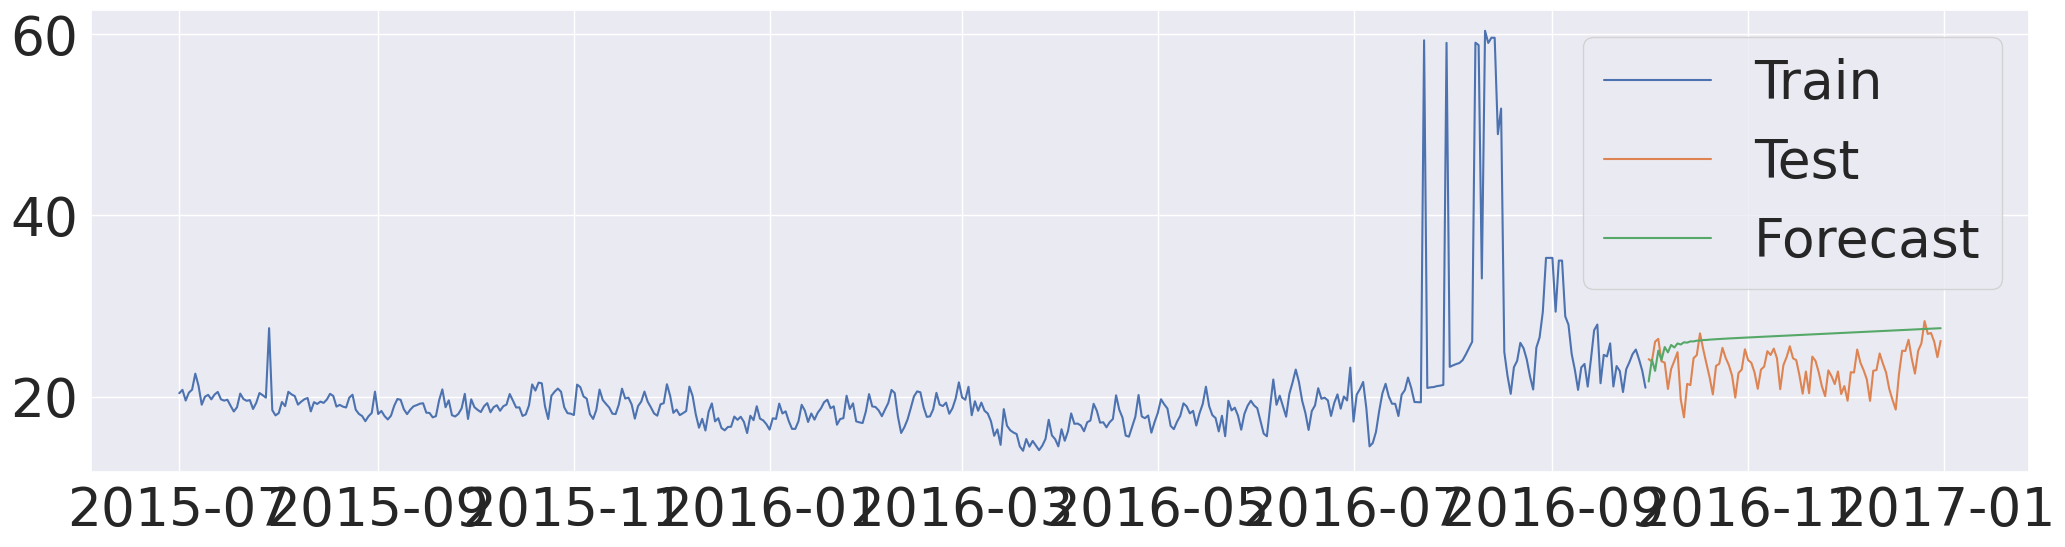

In [145]:
auto_arima_model = auto_arima(train,start_p=2,max_p=7,start_q=2,max_q=7, m=1,stationary=False,trace=True, seasonal=False,error_action='ignore',suppress_warnings=True)
auto_arima_model.fit(train)

auto_arima_forecast = auto_arima_model.predict(n_periods=test.shape[0])
auto_arima_forecast = pd.DataFrame(auto_arima_forecast,index = test.index,columns=['Forecast'])

plt.figure(figsize=(25,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(auto_arima_forecast, label='Forecast')
plt.legend()
plt.show()

In [146]:
with open('auto_arima_model.pkl', 'wb') as f:
    pickle.dump(auto_arima_model, f)

In [147]:
rmse_values.append(('Auto-arima',np.sqrt(np.mean(np.square(auto_arima_forecast.values - test.Views.values)))))

In [148]:
# RMSE
rmse_df = pd.DataFrame(rmse_values,columns=['Model','RMSE_values']).sort_values('RMSE_values')
rmse_df

,Model,RMSE_values
2,Exponential Smoothing,2.278367
0,ARMA,2.490738
1,ARIMA,3.060449
3,Auto-arima,4.042591


# 9. LSTMs

In [149]:
def transform_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [151]:
time_steps = 10

In [152]:

X_train, y_train = transform_dataset(train, train.Views, time_steps)
X_test, y_test = transform_dataset(test, test.Views, time_steps)

In [154]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=256,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.RMSprop()
)

2023-03-04 11:46:43.643079: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-03-04 11:46:43.643182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: suraj
2023-03-04 11:46:43.643197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: suraj
2023-03-04 11:46:43.643499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 418.226.0
2023-03-04 11:46:43.643556: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 418.226.0
2023-03-04 11:46:43.643569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 418.226.0
2023-03-04 11:46:43.654298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Librar

In [156]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/200
26/26 [==============================] - 1s 25ms/step - loss: 21.9189 - val_loss: 131.9244
Epoch 2/200
26/26 [==============================] - 1s 20ms/step - loss: 22.6592 - val_loss: 110.1829
Epoch 3/200
26/26 [==============================] - 1s 19ms/step - loss: 20.7283 - val_loss: 164.5302
Epoch 4/200
26/26 [==============================] - 1s 21ms/step - loss: 21.6577 - val_loss: 136.4046
Epoch 5/200
26/26 [==============================] - 1s 20ms/step - loss: 19.6661 - val_loss: 206.7775
Epoch 6/200
26/26 [==============================] - 1s 19ms/step - loss: 20.7161 - val_loss: 170.4287
Epoch 7/200
26/26 [==============================] - 0s 19ms/step - loss: 18.7616 - val_loss: 251.5180
Epoch 8/200
26/26 [==============================] - 1s 19ms/step - loss: 20.2247 - val_loss: 195.3827
Epoch 9/200
26/26 [==============================] - 1s 20ms/step - loss: 17.8700 - val_loss: 281.2467
Epoch 10/200
26/26 [==============================] - 1s 21ms/step - loss

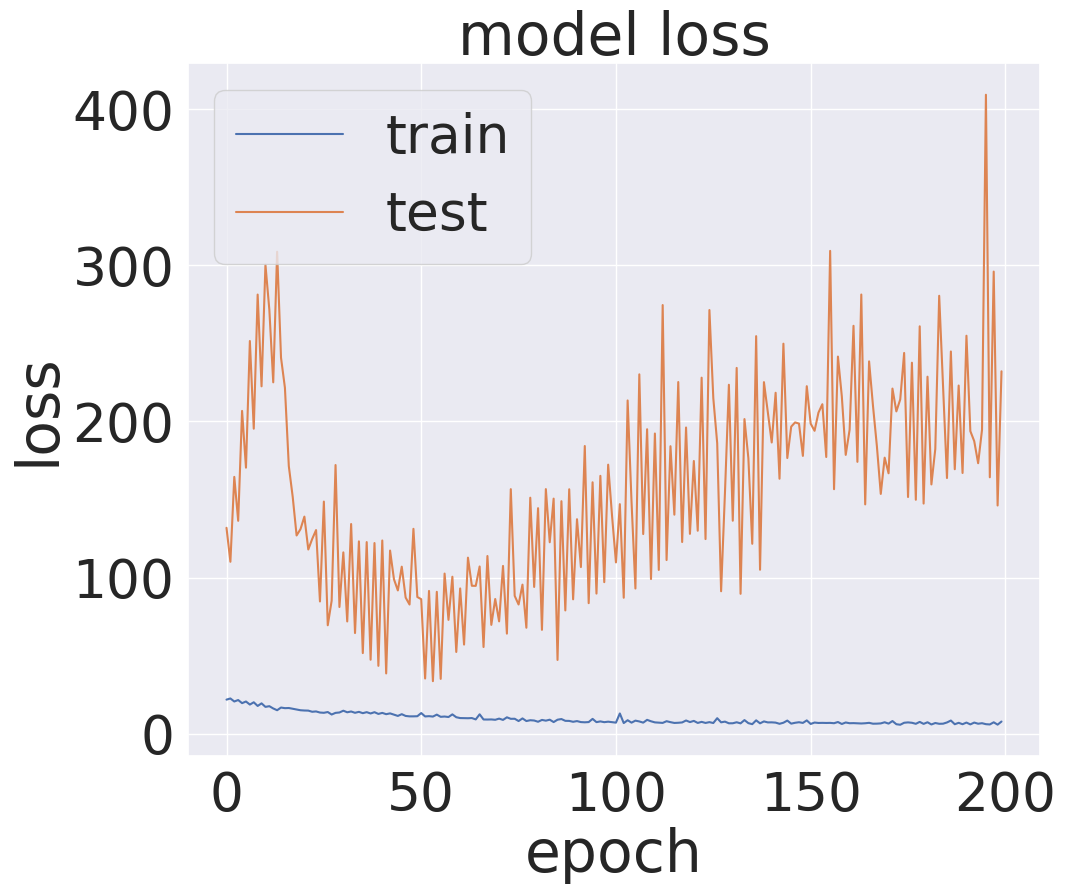

In [157]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
# Forecasting using test data
y_pred = model.predict(X_test)

3/3 [==============================] - 1s 10ms/step


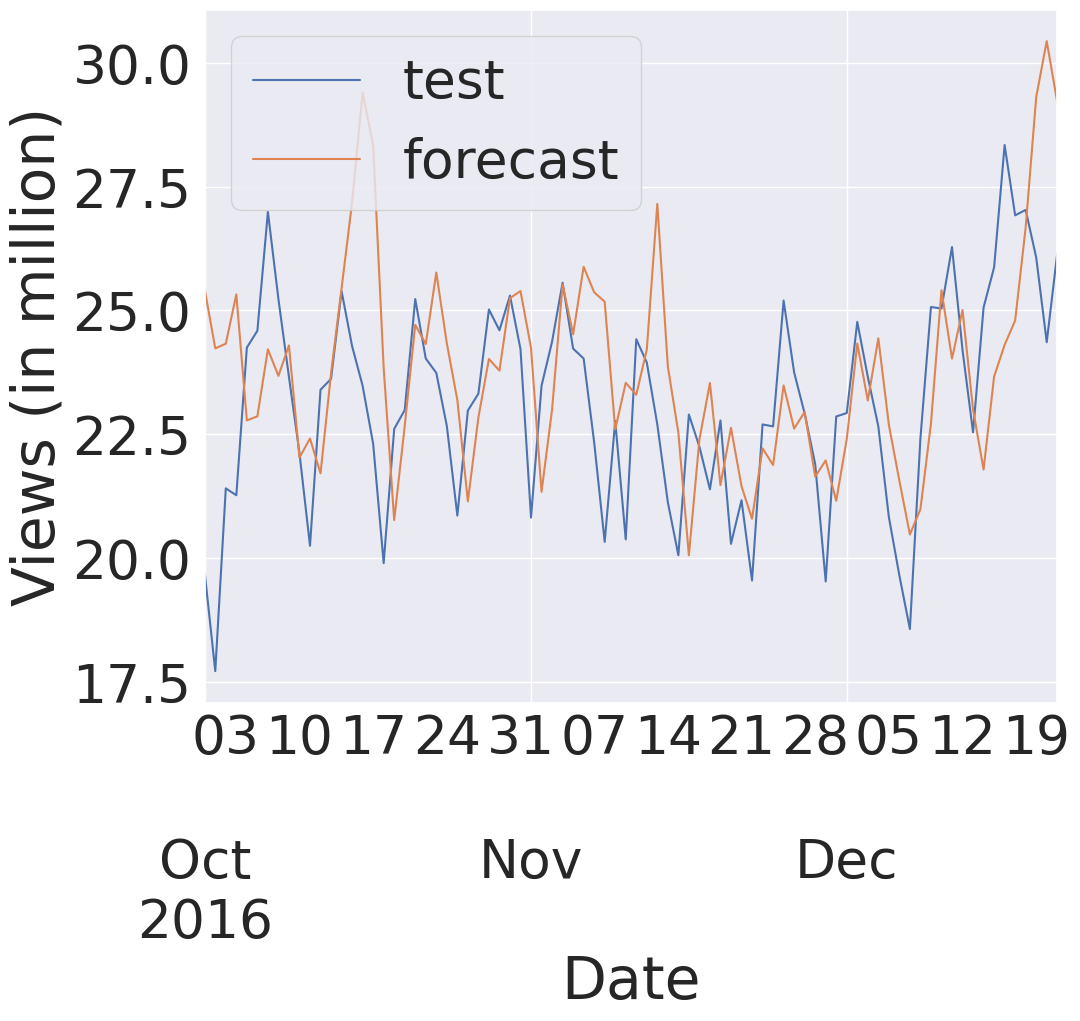

In [159]:
fig,ax=plt.subplots()
pd.DataFrame({'Date':test.index[:y_test.shape[0]],'Views':y_test}).plot('Date',ax=ax)
pd.DataFrame({'Date':test.index[:y_pred.shape[0]],'Views':y_pred.flatten()}).plot('Date',ax=ax)
plt.legend(['test', 'forecast'], loc='upper left')
plt.ylabel('Views (in million)')
plt.show()

In [160]:
print('RMSE:'+str(np.sqrt(np.mean(np.square(y_pred.flatten() - y_test)))))


RMSE:2.463284817134718


# 10. CNN1D

In [161]:
n_features=1
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, n_features)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [164]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/200
26/26 [==============================] - 1s 11ms/step - loss: 7.8195 - val_loss: 17.1962
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 14.0456 - val_loss: 107.3649
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 40.5489 - val_loss: 36.9025
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 33.6860 - val_loss: 69.0665
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 11.8758 - val_loss: 66.2447
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 18.1984 - val_loss: 44.2876
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 12.6297 - val_loss: 44.0446
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 9.3201 - val_loss: 48.8747
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 8.7137 - val_loss: 52.4716
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 8.5943 - val_loss:

In [165]:
#forecasting
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 3ms/step


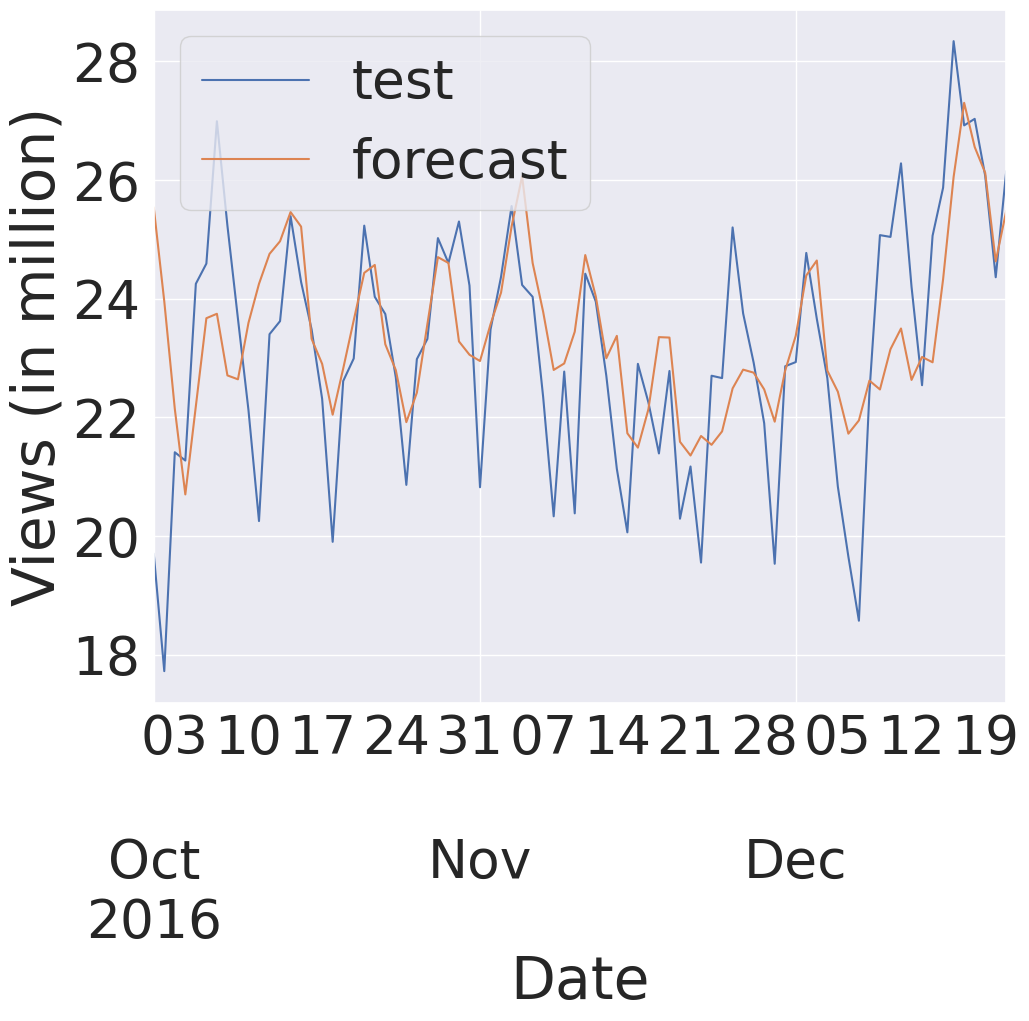

In [166]:
fig,ax=plt.subplots()
pd.DataFrame({'Date':test.index[:y_test.shape[0]],'Views':y_test}).plot('Date',ax=ax)
pd.DataFrame({'Date':test.index[:y_pred.shape[0]],'Views':y_pred.flatten()}).plot('Date',ax=ax)
plt.legend(['test', 'forecast'], loc='upper left')
plt.ylabel('Views (in million)')
plt.show()

In [167]:
print('RMSE:'+str(np.sqrt(np.mean(np.square(y_pred.flatten() - y_test)))))


RMSE:1.7446934248738446
